# Exploring Biodiversity Metrics: A Comprehensive Statistical Analysis of the Palmer Penguins Dataset
Andrex Ibiza, MBA | Johnson & Wales University | Original Date: 2024-04-14

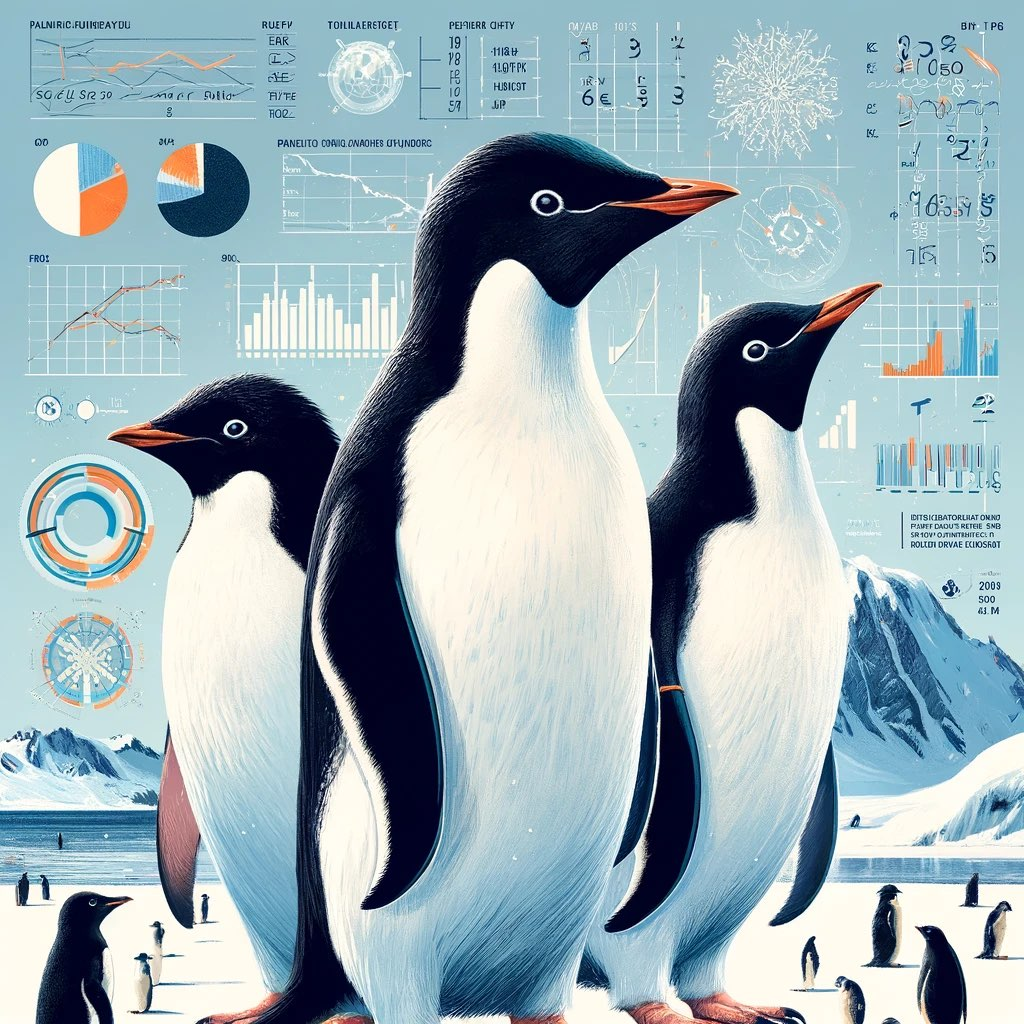

**Abstract**:
This project, developed over 15 weeks as part of the DATA5150 - Statistical Analysis course at Johnson & Wales University, showcases a comprehensive application of statistical techniques using the Palmer Penguins dataset. The primary objective is to demonstrate the effective use of statistical methods to analyze real-world data, focusing on the relationships among biological markers such as species type, bill dimensions, flipper length, and body mass. By leveraging the built-in R PalmerPenguins dataset, this study emphasizes the practical application of statistical analysis without the need for extensive data cleaning or wrangling. The project serves as an educational tool, illustrating the power of statistical techniques in extracting meaningful insights and fostering a deeper understanding of data analysis processes. Through this exploration, the study highlights the versatility and importance of statistical literacy in various analytical contexts.

# Week 1 - Introduction
The Palmer Penguins dataset is a valuable resource for both ecologists and data scientists, providing a comprehensive view of penguin biodiversity in the Antarctic region. Compiled by Horst AM, Hill AP, and Gorman KB, this dataset includes detailed measurements from three penguin species—Adélie, Chinstrap, and Gentoo—across three islands in the Palmer Archipelago, Antarctica. With variables such as species, island, bill length, bill depth, flipper length, body mass, and sex, the dataset offers a rich foundation for exploring the morphological diversity shaped by ecological and evolutionary forces. This project leverages the dataset to demonstrate a range of statistical techniques, highlighting its potential to uncover insights into the complex interactions within these penguin populations.

## Significance of the Study
The conservation of Antarctic marine species is increasingly pressing in the face of climatic and environmental shifts. Understanding species-specific responses to environmental changes through detailed morphological and demographic data is crucial for predicting future impacts on these populations and formulating effective conservation strategies. The Palmer Penguins dataset not only facilitates a granular analysis of interspecies characteristics but also serves as a proxy for gauging the health of the broader marine ecosystem in the Antarctic region.

## Objectives of the Study
The primary objectives of this study are to:

* Conduct a detailed exploratory data analysis to identify key characteristics and distributions within the Palmer Penguins dataset, showcasing the application of various statistical visualization techniques.
* Apply a range of statistical methods, including regression models and hypothesis testing, to explore relationships among penguin species' physical characteristics, demonstrating the practical use of these techniques in data analysis.
* Utilize the dataset as a case study to illustrate the process of statistical analysis, emphasizing the educational value of applying statistical methods to real-world data without extensive data cleaning or wrangling.

## Research Question
* What are the key morphological differences among the three penguin species, and how do these relate to ecological roles and behaviors?

# Week 2 - Data Loading and Cleaning
The first steps in the project are to load the data into a dataframe and begin a cursory inspection of its overall features.

The penguins_raw dataset from the palmerpenguins package contains data on 344 penguin observations with 17 variables. The original variables in the dataset were `studyName`, `Sample Number`, `Species`, `Region`, `Island`, `Stage`, `Individual ID`, `Clutch Completion`, `Date Egg`, `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, `Body Mass (g)`, `Sex`, `Delta 15 N (o/oo)`, `Delta 13 C (o/oo)` and `Comments`.

I made the following changes to the dataset: 
- `studyName`: changed to `study_name`
- `Sample Number`: changed to `sample_number` and converted to integer
- `Species`: changed to `species`, converted to factor, names shortened
- `Region`: changed to `region` and converted to factor
- `Island`: changed to `island` and converted to factor
- `Stage`: changed to `stage` and converted to factor
- `Individual ID`: changed to `individual_id`
- `Clutch Completion`: changed to `clutch_completion` and converted to factor
- `Date Egg`: changed to `date_egg`
- `Culmen Length (mm)`: changed to `culmen_length_mm`
- `Culmen Depth (mm)`: changed to `culmen_depth_mm`
- `Flipper Length (mm)`: changed to `flipper_length_mm`
- `Body Mass (g)`: changed to `weight`
- `Sex`: changed to `sex` and converted to factor
- `Delta 15 N (o/oo)`: changed to `delta_15_n`
- `Delta 13 C (o/oo)`: changed to `delta_13_c`
- `Comments`: changed to `comments`

The cleansed dataset contains the following variables: 
- `study_name` (character) – Sampling expedition from which data were collected, generated, etc.
- `sample_number` (integer) – an integer denoting the continuous numbering sequence for each sample
- `species` (factor) – 3 levels: “Adelie”, “Chinstrap”, and “Gentoo”
- `region` (factor) – only 1 level, “Anvers”, denoting the region of Palmer LTER sampling grid
- `island` (factor) – 3 levels – “Biscoe”, “Dream”, and “Torgersen” denoting the island near Palmer Station where samples were collected
- `stage` (factor) – 1 level – “Adult, 1 Egg Stage” – denotes reproductive stage at sampling
- `individual_id` (character) – alphanumeric unique identifier for each individual penguin represented in the data
- `clutch_completion` (factor) – 2 factors – “Yes” or “No” – denoting whether the study nest was observed with a full clutch, i.e. 2 eggs
- `date_egg` (date) denotes the date study nest observed with one egg (sampled)
- `culmen_length_mm` (numeric) – a number in millimeters denoting the length of the dorsal ridge of a bird’s bill
- `culmen_depth_mm` (numeric) – a number in millimeters denoting the depth of the dorsal ridge of a bird’s bill
- `flipper_length_mm` (numeric) – a number in millimeters denoting the length of the penguin’s flipper
- `body_mass_g` (numeric) – a number denoting the body mass of the penguin in grams
- `sex` (factor) – denotes penguin’s sex
- `delta_15_n` (numeric) - a number denoting the measure of the ratio of stable isotopes 15N:14N
- `delta_13_c` (numeric) - a number denoting the measure of the ratio of stable isotopes 13C:12C
- `comments` (character) – text providing additional relevant information for the data

The dimensions of the cleansed dataset are 344 x 17.

In [1]:
# Install packages
install.packages("palmerpenguins")
install.packages("naniar")
install.packages("gt")
install.packages("BSDA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘glue’


Warning message in install.packages("gt"):
“installation of package ‘glue’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load packages
library(BSDA)
library(gt)
library(naniar)
library(palmerpenguins)
library(tidyverse)

Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# Set df
df <- penguins_raw

# Print first 10 rows
head(df, 10)

# Print the last 10 rows of the data set
tail(df, 10)

studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NA,NA,NA,NA,NA,NA,NA,Adult not sampled.
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NA
PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190,3650,MALE,8.66496,-25.29805,NA
PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181,3625,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195,4675,MALE,9.46060,-24.89958,Nest never observed with full clutch.
PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193,3475,NA,NA,NA,No blood sample obtained.


studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0910,59,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N95A1,Yes,2009-11-21,50.2,18.8,202,3800,MALE,9.74492,-24.40400,NA
PAL0910,60,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N95A2,Yes,2009-11-21,45.6,19.4,194,3525,FEMALE,9.46985,-24.65786,NA
PAL0910,61,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A1,Yes,2009-11-27,51.9,19.5,206,3950,MALE,NA,-23.78767,No delta15N data received from lab.
PAL0910,62,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A2,Yes,2009-11-27,46.8,16.5,189,3650,FEMALE,9.65061,-24.48153,NA
PAL0910,63,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A1,Yes,2009-11-19,45.7,17.0,195,3650,FEMALE,9.26715,-24.31912,NA
PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207,4000,MALE,9.70465,-24.53494,NA
PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202,3400,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193,3775,MALE,9.46180,-24.70615,Nest never observed with full clutch.
PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210,4100,MALE,9.98044,-24.68741,NA


In [5]:
# Find the dimensions of the data set
dim(df)

# Determine the names of the variables in the data set
colnames(df)

# Determine the structure of the variables in the data set
str(df)

[1] 344  17

[1] "studyName"           "Sample Number"       "Species"            
 [4] "Region"              "Island"              "Stage"              
 [7] "Individual ID"       "Clutch Completion"   "Date Egg"           
[10] "Culmen Length (mm)"  "Culmen Depth (mm)"   "Flipper Length (mm)"
[13] "Body Mass (g)"       "Sex"                 "Delta 15 N (o/oo)"  
[16] "Delta 13 C (o/oo)"   "Comments"

tibble [344 × 17] (S3: tbl_df/tbl/data.frame)
 $ studyName          : chr [1:344] "PAL0708" "PAL0708" "PAL0708" "PAL0708" ...
 $ Sample Number      : num [1:344] 1 2 3 4 5 6 7 8 9 10 ...
 $ Species            : chr [1:344] "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" ...
 $ Region             : chr [1:344] "Anvers" "Anvers" "Anvers" "Anvers" ...
 $ Island             : chr [1:344] "Torgersen" "Torgersen" "Torgersen" "Torgersen" ...
 $ Stage              : chr [1:344] "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" ...
 $ Individual ID      : chr [1:344] "N1A1" "N1A2" "N2A1" "N2A2" ...
 $ Clutch Completion  : chr [1:344] "Yes" "Yes" "Yes" "Yes" ...
 $ Date Egg           : Date[1:344], format: "2007-11-11" "2007-11-11" ...
 $ Culmen Length (mm) : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ Culmen Depth (mm)  : num [1:344] 18.7

In [6]:
# Reformat all column names
colnames(df)[1] <- "study_name"
colnames(df)[2] <- "sample_number"
colnames(df)[3] <- "species"
colnames(df)[4] <- "region"
colnames(df)[5] <- "island"
colnames(df)[6] <- "stage"
colnames(df)[7] <- "individual_id"
colnames(df)[8] <- "clutch_completion"
colnames(df)[9] <- "date_egg"
colnames(df)[10] <- "culmen_length_mm"
colnames(df)[11] <- "culmen_depth_mm"
colnames(df)[12] <- "flipper_length_mm"
colnames(df)[13] <- "body_mass_g"
colnames(df)[14] <- "sex"
colnames(df)[15] <- "delta_15_n"
colnames(df)[16] <- "delta_13_c"
colnames(df)[17] <- "comments"

# Recheck column names
colnames(df) # column re-naming successful!

# Check for missing data
miss_var_summary(df)

## There is missing data in: "comments" (84.3% miss.), "delta_15_n" (4.07%), 
## "delta_13_c" (3.78%), "sex" (3.20%), "culmen_length_mm" (0.581%),
## "culmen_depth_mm" (0.581%), flipper_length_mm" (0.581%), "body_mass_g" (0.581%)

[1] "study_name"        "sample_number"     "species"          
 [4] "region"            "island"            "stage"            
 [7] "individual_id"     "clutch_completion" "date_egg"         
[10] "culmen_length_mm"  "culmen_depth_mm"   "flipper_length_mm"
[13] "body_mass_g"       "sex"               "delta_15_n"       
[16] "delta_13_c"        "comments"

variable,n_miss,pct_miss
<chr>,<int>,<num>
comments,290,84.3
delta_15_n,14,4.07
delta_13_c,13,3.78
sex,11,3.20
culmen_length_mm,2,0.581
culmen_depth_mm,2,0.581
flipper_length_mm,2,0.581
body_mass_g,2,0.581
study_name,0,0


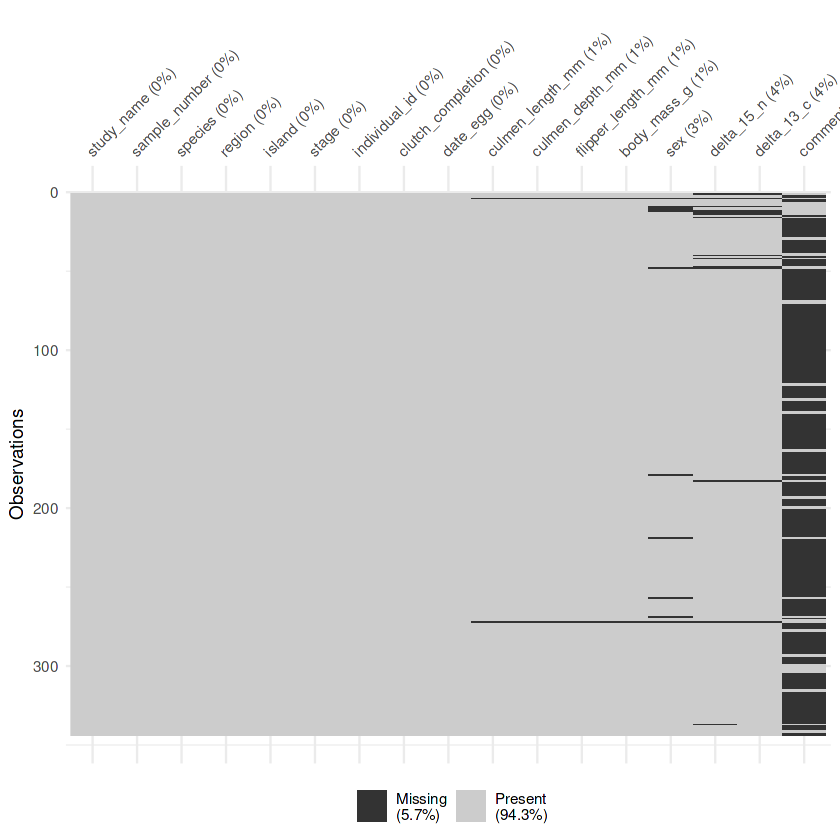

In [8]:
# Visualize missing data
vis_miss(df)

In [9]:
# View columns listed above to ensure missing data is listed as NA
df$comments # all are NA
df$delta_15_n # all are NA
df$delta_13_c # all are NA
df$sex # all are NA
df$culmen_length_mm # all are NA
df$culmen_depth_mm # all are NA
df$flipper_length_mm # all are NA
df$body_mass_g # all are NA

# Check that the sum of the number of good data values and the number of missing 
# data values is equal to the total number of data values for the columns
sum(is.na(df$comments)) + sum(!is.na(df$comments)) - nrow(df) # 0
sum(is.na(df$delta_15_n)) + sum(!is.na(df$delta_15_n)) - nrow(df) # 0
sum(is.na(df$delta_13_c)) + sum(!is.na(df$delta_13_c)) - nrow(df) # 0
sum(is.na(df$sex)) + sum(!is.na(df$sex)) - nrow(df) # 0
sum(is.na(df$culmen_length_mm)) + sum(!is.na(df$culmen_length_mm)) - nrow(df) # 0
sum(is.na(df$culmen_depth_mm)) + sum(!is.na(df$culmen_depth_mm)) - nrow(df) # 0
sum(is.na(df$flipper_length_mm)) + sum(!is.na(df$flipper_length_mm)) - nrow(df) # 0
sum(is.na(df$body_mass_g)) + sum(!is.na(df$body_mass_g)) - nrow(df) # 0

# Determine the structure of the variables in the data set
str(df)

[1] "Not enough blood for isotopes."                                      
  [2] NA                                                                    
  [3] NA                                                                    
  [4] "Adult not sampled."                                                  
  [5] NA                                                                    
  [6] NA                                                                    
  [7] "Nest never observed with full clutch."                               
  [8] "Nest never observed with full clutch."                               
  [9] "No blood sample obtained."                                           
 [10] "No blood sample obtained for sexing."                                
 [11] "No blood sample obtained for sexing."                                
 [12] "No blood sample obtained."                                           
 [13] "Not enough blood for isotopes."                                      
 [14] "Not enough blood for isotopes."                                      
 [15] NA                                                                    
 [16] "Not enough blood for isotopes."                                      
 [17] NA                                                                    
 [18] NA                                                                    
 [19] NA                                                                    
 [20] NA                                                                    
 [21] NA                                                                    
 [22] NA                                                                    
 [23] NA                                                                    
 [24] NA                                                                    
 [25] NA                                                                    
 [26] NA                                                                    
 [27] NA                                                                    
 [28] NA                                                                    
 [29] "Nest never observed with full clutch."                               
 [30] "Nest never observed with full clutch."                               
 [31] NA                                                                    
 [32] NA                                                                    
 [33] NA                                                                    
 [34] NA                                                                    
 [35] NA                                                                    
 [36] NA                                                                    
 [37] NA                                                                    
 [38] NA                                                                    
 [39] "Nest never observed with full clutch."                               
 [40] "Nest never observed with full clutch. Not enough blood for isotopes."
 [41] NA                                                                    
 [42] "Not enough blood for isotopes."                                      
 [43] NA                                                                    
 [44] NA                                                                    
 [45] NA                                                                    
 [46] NA                                                                    
 [47] "Not enough blood for isotopes."                                      
 [48] "Sexing primers did not amplify. Not enough blood for isotopes."      
 [49] NA                                                                    
 [50] NA                                                                    
 [51] NA                                                                    
 [52] NA                                                                   

[1]       NA  8.94956  8.36821       NA  8.76651  8.66496  9.18718  9.46060
  [9]       NA  9.13362  8.63243       NA       NA       NA  8.55583       NA
 [17]  9.18528  8.67538  8.47827  9.11616  8.73762  8.66271  9.22286  8.43423
 [25]  9.63954  9.21292  8.93997  8.08138  8.38404  8.90027  9.69756  9.72764
 [33]  9.66523  8.79665  9.17847  9.15308  9.18985  8.04787  9.41131       NA
 [41]  9.68933       NA  9.50772  9.23720  9.36392  9.49106       NA       NA
 [49]  9.51784  8.87988  8.46616  8.51362  8.19539  8.48095  8.41837  8.35396
 [57]  8.57199  8.56674  9.07878  9.10800  8.96472  8.74802  8.58063  8.62264
 [65]  8.62623  8.85562  8.56192  8.71078  8.47781  8.86853  7.88863  9.29808
 [73]  8.33524  8.18658  8.70642  8.29930  8.47257  8.35540  7.82381  9.05736
 [81]  7.69778  8.63259  7.88494  8.90002  8.32718  9.14863  8.57087  8.59147
 [89]  9.07826  8.36936  8.46531  8.77018  8.01485  8.49915  8.90723  8.48204
 [97]  8.10277  8.39459  9.04218  8.97025  8.84451  9.01079  9.21510  9.51929
[105]  9.02642  8.85699  8.77322  9.59245  9.79532  9.31735  8.43951  8.65466
[113]  9.02657  8.80186  8.80967  8.91434  9.18021  9.49645  8.96436  9.32277
[121]  9.04296  9.11066  9.30722  9.59462  8.81668  9.22537  8.88098  8.52566
[129]  9.19031  9.10702  8.98460  8.86495  8.98705  8.56708  8.71700  8.94365
[137]  8.75984  8.95998  8.61651  9.25769  9.28810  9.23408  8.79787  9.05674
[145]  9.06829  9.22033  9.11006  8.68744  8.94332  8.97533  8.93465  8.89640
[153]  7.99300  8.14756  8.14705  8.25540  8.23450  7.99530  8.24515  8.22673
[161]  8.13643  8.16310  8.19579  8.10417  7.77672  7.82080  7.79958  8.07137
[169]  7.63884  8.27376  7.84057  7.96491  7.89620  7.63220  7.90436  7.90971
[177]  7.68528  7.83733  7.96621  7.92358  7.68870  8.30515       NA  7.63452
[185]  7.97408  7.76843  7.89744  8.03659  7.96935  8.13746  8.01979  8.14776
[193]  8.14567  8.38324  8.37615  8.26548  8.46894  8.27141  8.47829  8.65803
[201]  8.45167  8.55868  8.38289  8.39867  8.51951  8.50153  8.48789  8.63488
[209]  8.58319  8.63604  8.48367  8.74647  8.65015  8.60092  8.62870  8.49662
[217]  8.60447  8.47067  8.24253  8.49854  8.64931  8.63551  8.53018  8.35078
[225]  8.24651  8.58487  8.47938  8.59640  8.39299  8.40327  8.24694  8.19749
[233]  8.35802  8.28601  8.19101  8.20042  8.11238  8.27428  8.23468  8.15426
[241]  8.12691  8.27595  8.29671  8.36701  8.15566  8.83352  8.20106  8.27102
[249]  8.03624  7.88810  8.16582  8.20660  8.10231  8.31180  8.30817  8.65914
[257]  8.25818  8.32359  8.12311  8.41017  8.42070  8.45738  8.24691  8.29226
[265]  8.21634  8.78557  8.30231  8.08354  8.04111  8.33825  7.99184       NA
[273]  8.41151  8.30166  8.24246  8.36390  9.03935  8.92069  9.29078  8.64701
[281]  9.00642  8.88942  8.85664  8.63701  8.47173  8.79581  8.95063  8.68747
[289]  8.72037  9.02330  9.12277  9.80590 10.02019  9.14382  9.32105  9.27158
[297]  9.35138  9.42666  9.35416  9.28153  9.74144  9.36799  8.93990  9.63074
[305]  9.37369  9.25177  9.08458  9.49283  9.36668  9.23196  9.75486  9.07825
[313]  8.83502  9.43146  9.80589 10.02544  9.53262  9.61734 10.02372  9.36493
[321]  9.43684  9.45827  9.46819  9.34089  9.68950  9.32169  9.46929  9.43782
[329]  9.41500  9.93727  9.56534  9.77528  9.62357  9.88809  9.74492  9.46985
[337]       NA  9.65061  9.26715  9.70465  9.37608  9.46180  9.98044  9.39305

[1]        NA -24.69454 -25.33302        NA -25.32426 -25.29805 -25.21799
  [8] -24.89958        NA -25.09368 -25.21315        NA        NA        NA
 [15] -25.22588        NA -25.06691 -25.13993 -25.23319 -24.77227 -25.09383
 [22] -25.06390 -25.03474 -25.22664 -25.29856 -24.36130 -25.36288 -25.49448
 [29] -25.19837 -25.11609 -25.11223 -25.01020 -25.06020 -25.14591 -25.23061
 [36] -25.03469 -25.12255 -25.49523 -25.04169        NA -24.42280        NA
 [43] -25.03492 -24.52698 -25.01745 -24.10255        NA        NA -25.07683
 [50] -25.18543 -26.12989 -26.55602 -26.17213 -26.31460 -26.54718 -26.27853
 [57] -26.07188 -25.98843 -25.88156 -25.89677 -26.40943 -26.37809 -26.21569
 [64] -26.60023 -26.11650 -26.09294 -25.95541 -25.81012 -26.07821 -26.06209
 [71] -26.63085 -25.23453 -26.55351 -26.45978 -26.15003 -26.38986 -26.02002
 [78] -26.44787 -26.51382 -25.81513 -26.53870 -26.23027 -26.24837 -26.46254
 [85] -26.38396 -26.09635 -26.22227 -26.08165 -26.12417 -26.11199 -26.05621
 [92] -25.83352 -26.69543 -26.42406 -26.30037 -26.57941 -26.50086 -26.01152
 [99] -26.15775 -26.03679 -26.28055 -26.38085 -26.22530 -25.69199 -25.86482
[106] -25.80208 -26.48973 -25.70711 -25.27385 -25.45171 -26.57563 -26.32909
[113] -26.06203 -26.41218 -26.78958 -26.42018 -25.77264 -26.36678 -23.90309
[120] -26.09989 -26.19444 -26.42563 -25.61039 -25.42621 -25.95399 -25.60826
[127] -25.89741 -26.02450 -25.73722 -26.01363 -25.57956 -26.13960 -25.57647
[134] -26.49288 -25.77951 -26.06943 -25.97696 -26.32601 -26.07021 -25.88798
[141] -25.54976 -26.01549 -26.61075 -25.79529 -25.85203 -26.03442 -25.79549
[148] -25.83060 -25.79189 -26.03495 -26.07081 -26.06967 -25.51390 -25.39369
[155] -25.46172 -25.40075 -25.54456 -25.32829 -25.46782 -25.42760 -25.32176
[162] -25.38017 -25.39330 -25.50562 -25.41680 -25.48025 -25.62618 -25.52473
[169] -25.52627 -25.00169 -25.37899 -25.39587 -25.37746 -25.46569 -25.39470
[176] -25.38157 -25.39181 -25.42826 -25.69327 -25.48383 -25.50811 -25.19017
[183]        NA -25.46327 -25.53768 -25.68210 -26.63405 -26.86127 -26.70968
[190] -26.79093 -26.68311 -26.84506 -26.59467 -26.84272 -26.72791 -26.76990
[197] -26.60436 -26.77650 -26.61788 -26.57585 -26.89644 -26.67799 -26.86352
[204] -26.79358 -27.01854 -26.61414 -26.83006 -26.75621 -26.84415 -26.74890
[211] -26.86485 -26.79846 -26.79053 -26.84374 -26.60484 -26.84166 -26.61601
[218] -26.69166 -26.81540 -26.74809 -26.68867 -26.74249 -26.72751 -26.70783
[225] -26.66958 -26.59290 -26.95470 -26.71199 -26.78733 -26.76821 -26.65359
[232] -26.65931 -26.27660 -26.27573 -26.24369 -26.39677 -26.20372 -26.30019
[239] -26.18599 -26.34330 -26.23613 -26.11657 -26.08547 -25.89834 -26.22848
[246] -25.69195 -26.16524 -26.11244 -26.06594 -26.04726 -26.13971 -26.36863
[253] -26.18763 -26.35425 -26.21651 -25.79203 -26.23886 -26.05756 -26.44815
[260] -26.33867 -26.38092 -26.22664 -26.18466 -26.21019 -26.11046 -25.76147
[267] -25.96013 -26.18161 -26.18444 -25.88547 -26.20538        NA -26.13832
[274] -26.04117 -26.11969 -26.15531 -24.30229 -24.23592 -24.75570 -24.62717
[281] -24.61867 -24.49433 -24.55644 -24.84059 -24.29229 -24.36088 -24.59897
[288] -24.38751 -24.80526 -24.38933 -24.90024 -24.72940 -24.54704 -24.57994
[295] -24.64162 -24.64335 -24.68790 -24.26375 -25.01185 -24.97134 -24.59467
[302] -24.47142 -23.89017 -24.34684 -24.52896 -24.69638 -24.54903 -24.59996
[309] -24.45195 -24.17282 -24.31198 -25.14550 -24.65859 -24.68440 -24.73735
[316] -24.90816 -24.66867 -24.66188 -24.86594 -24.66259 -24.16566 -24.35575
[323] -24.45721 -24.45189 -24.43062 -24.41562 -24.48403 -24.36202 -24.80500
[330] -24.59066 -24.60882 -24.56481 -24.78984 -24.59513 -24.40400 -24.65786
[337] -23.78767 -24.48153 -24.31912 -24.53494 -24.40753 -24.70615 -24.68741
[344] -24.25255

[1] "MALE"   "FEMALE" "FEMALE" NA       "FEMALE" "MALE"   "FEMALE" "MALE"  
  [9] NA       NA       NA       NA       "FEMALE" "MALE"   "MALE"   "FEMALE"
 [17] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [25] "MALE"   "FEMALE" "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"  
 [33] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
 [41] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   NA      
 [49] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [57] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [65] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [73] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [81] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"
 [89] "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
 [97] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[105] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[113] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[121] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[129] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[137] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[145] "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"  
[153] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
[161] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[169] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
[177] "FEMALE" "MALE"   NA       "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"
[185] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[193] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
[201] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[209] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[217] "FEMALE" "MALE"   NA       "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[225] "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[233] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[241] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[249] "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[257] NA       "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[265] "FEMALE" "MALE"   "FEMALE" "MALE"   NA       "MALE"   "FEMALE" NA      
[273] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"
[281] "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[289] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
[297] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"  
[305] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"
[313] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "MALE"   "FEMALE"
[321] "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE" "FEMALE" "MALE"  
[329] "FEMALE" "MALE"   "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"
[337] "MALE"   "FEMALE" "FEMALE" "MALE"   "FEMALE" "MALE"   "MALE"   "FEMALE"

[1] 39.1 39.5 40.3   NA 36.7 39.3 38.9 39.2 34.1 42.0 37.8 37.8 41.1 38.6 34.6
 [16] 36.6 38.7 42.5 34.4 46.0 37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 40.5
 [31] 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8 36.0 44.1 37.0
 [46] 39.6 41.1 37.5 36.0 42.3 39.6 40.1 35.0 42.0 34.5 41.4 39.0 40.6 36.5 37.6
 [61] 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8 33.5 39.7 39.6 45.8 35.5
 [76] 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1 37.3 41.3 36.3 36.9 38.3 38.9
 [91] 35.7 41.1 34.0 39.6 36.2 40.8 38.1 40.3 33.1 43.2 35.0 41.0 37.7 37.8 37.9
[106] 39.7 38.6 38.2 38.1 43.2 38.1 45.6 39.7 42.2 39.6 42.7 38.6 37.3 35.7 41.1
[121] 36.2 37.7 40.2 41.4 35.2 40.6 38.8 41.5 39.0 44.1 38.5 43.1 36.8 37.5 38.1
[136] 41.1 35.6 40.2 37.0 39.7 40.2 40.6 32.1 40.7 37.3 39.0 39.2 36.6 36.0 37.8
[151] 36.0 41.5 46.1 50.0 48.7 50.0 47.6 46.5 45.4 46.7 43.3 46.8 40.9 49.0 45.5
[166] 48.4 45.8 49.3 42.0 49.2 46.2 48.7 50.2 45.1 46.5 46.3 42.9 46.1 44.5 47.8
[181] 48.2 50.0 47.3 42.8 45.1 59.6 49.1 48.4 42.6 44.4 44.0 48.7 42.7 49.6 45.3
[196] 49.6 50.5 43.6 45.5 50.5 44.9 45.2 46.6 48.5 45.1 50.1 46.5 45.0 43.8 45.5
[211] 43.2 50.4 45.3 46.2 45.7 54.3 45.8 49.8 46.2 49.5 43.5 50.7 47.7 46.4 48.2
[226] 46.5 46.4 48.6 47.5 51.1 45.2 45.2 49.1 52.5 47.4 50.0 44.9 50.8 43.4 51.3
[241] 47.5 52.1 47.5 52.2 45.5 49.5 44.5 50.8 49.4 46.9 48.4 51.1 48.5 55.9 47.2
[256] 49.1 47.3 46.8 41.7 53.4 43.3 48.1 50.5 49.8 43.5 51.5 46.2 55.1 44.5 48.8
[271] 47.2   NA 46.8 50.4 45.2 49.9 46.5 50.0 51.3 45.4 52.7 45.2 46.1 51.3 46.0
[286] 51.3 46.6 51.7 47.0 52.0 45.9 50.5 50.3 58.0 46.4 49.2 42.4 48.5 43.2 50.6
[301] 46.7 52.0 50.5 49.5 46.4 52.8 40.9 54.2 42.5 51.0 49.7 47.5 47.6 52.0 46.9
[316] 53.5 49.0 46.2 50.9 45.5 50.9 50.8 50.1 49.0 51.5 49.8 48.1 51.4 45.7 50.7
[331] 42.5 52.2 45.2 49.3 50.2 45.6 51.9 46.8 45.7 55.8 43.5 49.6 50.8 50.2

[1] 18.7 17.4 18.0   NA 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2 21.1
 [16] 17.8 19.0 20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9 18.6 18.9
 [31] 16.7 18.1 17.8 18.9 17.0 21.1 20.0 18.5 19.3 19.1 18.0 18.4 18.5 19.7 16.9
 [46] 18.8 19.0 18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6 17.5 18.8 16.6 19.1
 [61] 16.9 21.1 17.0 18.2 17.1 18.0 16.2 19.1 16.6 19.4 19.0 18.4 17.2 18.9 17.5
 [76] 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4 17.8 20.3 19.5 18.6 19.2 18.8
 [91] 18.0 18.1 17.1 18.1 17.3 18.9 18.6 18.5 16.1 18.5 17.9 20.0 16.0 20.0 18.6
[106] 18.9 17.2 20.0 17.0 19.0 16.5 20.3 17.7 19.5 20.7 18.3 17.0 20.5 17.0 18.6
[121] 17.2 19.8 17.0 18.5 15.9 19.0 17.6 18.3 17.1 18.0 17.9 19.2 18.5 18.5 17.6
[136] 17.5 17.5 20.1 16.5 17.9 17.1 17.2 15.5 17.0 16.8 18.7 18.6 18.4 17.8 18.1
[151] 17.1 18.5 13.2 16.3 14.1 15.2 14.5 13.5 14.6 15.3 13.4 15.4 13.7 16.1 13.7
[166] 14.6 14.6 15.7 13.5 15.2 14.5 15.1 14.3 14.5 14.5 15.8 13.1 15.1 14.3 15.0
[181] 14.3 15.3 15.3 14.2 14.5 17.0 14.8 16.3 13.7 17.3 13.6 15.7 13.7 16.0 13.7
[196] 15.0 15.9 13.9 13.9 15.9 13.3 15.8 14.2 14.1 14.4 15.0 14.4 15.4 13.9 15.0
[211] 14.5 15.3 13.8 14.9 13.9 15.7 14.2 16.8 14.4 16.2 14.2 15.0 15.0 15.6 15.6
[226] 14.8 15.0 16.0 14.2 16.3 13.8 16.4 14.5 15.6 14.6 15.9 13.8 17.3 14.4 14.2
[241] 14.0 17.0 15.0 17.1 14.5 16.1 14.7 15.7 15.8 14.6 14.4 16.5 15.0 17.0 15.5
[256] 15.0 13.8 16.1 14.7 15.8 14.0 15.1 15.2 15.9 15.2 16.3 14.1 16.0 15.7 16.2
[271] 13.7   NA 14.3 15.7 14.8 16.1 17.9 19.5 19.2 18.7 19.8 17.8 18.2 18.2 18.9
[286] 19.9 17.8 20.3 17.3 18.1 17.1 19.6 20.0 17.8 18.6 18.2 17.3 17.5 16.6 19.4
[301] 17.9 19.0 18.4 19.0 17.8 20.0 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6
[316] 19.9 19.5 17.5 19.1 17.0 17.9 18.5 17.9 19.6 18.7 17.3 16.4 19.0 17.3 19.7
[331] 17.3 18.8 16.6 19.9 18.8 19.4 19.5 16.5 17.0 19.8 18.1 18.2 19.0 18.7

[1] 181 186 195  NA 193 190 181 195 193 190 186 180 182 191 198 185 195 197
 [19] 184 194 174 180 189 185 180 187 183 187 172 180 178 178 188 184 195 196
 [37] 190 180 181 184 182 195 186 196 185 190 182 179 190 191 186 188 190 200
 [55] 187 191 186 193 181 194 185 195 185 192 184 192 195 188 190 198 190 190
 [73] 196 197 190 195 191 184 187 195 189 196 187 193 191 194 190 189 189 190
 [91] 202 205 185 186 187 208 190 196 178 192 192 203 183 190 193 184 199 190
[109] 181 197 198 191 193 197 191 196 188 199 189 189 187 198 176 202 186 199
[127] 191 195 191 210 190 197 193 199 187 190 191 200 185 193 193 187 188 190
[145] 192 185 190 184 195 193 187 201 211 230 210 218 215 210 211 219 209 215
[163] 214 216 214 213 210 217 210 221 209 222 218 215 213 215 215 215 216 215
[181] 210 220 222 209 207 230 220 220 213 219 208 208 208 225 210 216 222 217
[199] 210 225 213 215 210 220 210 225 217 220 208 220 208 224 208 221 214 231
[217] 219 230 214 229 220 223 216 221 221 217 216 230 209 220 215 223 212 221
[235] 212 224 212 228 218 218 212 230 218 228 212 224 214 226 216 222 203 225
[253] 219 228 215 228 216 215 210 219 208 209 216 229 213 230 217 230 217 222
[271] 214  NA 215 222 212 213 192 196 193 188 197 198 178 197 195 198 193 194
[289] 185 201 190 201 197 181 190 195 181 191 187 193 195 197 200 200 191 205
[307] 187 201 187 203 195 199 195 210 192 205 210 187 196 196 196 201 190 212
[325] 187 198 199 201 193 203 187 197 191 203 202 194 206 189 195 207 202 193
[343] 210 198

[1] 3750 3800 3250   NA 3450 3650 3625 4675 3475 4250 3300 3700 3200 3800 4400
 [16] 3700 3450 4500 3325 4200 3400 3600 3800 3950 3800 3800 3550 3200 3150 3950
 [31] 3250 3900 3300 3900 3325 4150 3950 3550 3300 4650 3150 3900 3100 4400 3000
 [46] 4600 3425 2975 3450 4150 3500 4300 3450 4050 2900 3700 3550 3800 2850 3750
 [61] 3150 4400 3600 4050 2850 3950 3350 4100 3050 4450 3600 3900 3550 4150 3700
 [76] 4250 3700 3900 3550 4000 3200 4700 3800 4200 3350 3550 3800 3500 3950 3600
 [91] 3550 4300 3400 4450 3300 4300 3700 4350 2900 4100 3725 4725 3075 4250 2925
[106] 3550 3750 3900 3175 4775 3825 4600 3200 4275 3900 4075 2900 3775 3350 3325
[121] 3150 3500 3450 3875 3050 4000 3275 4300 3050 4000 3325 3500 3500 4475 3425
[136] 3900 3175 3975 3400 4250 3400 3475 3050 3725 3000 3650 4250 3475 3450 3750
[151] 3700 4000 4500 5700 4450 5700 5400 4550 4800 5200 4400 5150 4650 5550 4650
[166] 5850 4200 5850 4150 6300 4800 5350 5700 5000 4400 5050 5000 5100 4100 5650
[181] 4600 5550 5250 4700 5050 6050 5150 5400 4950 5250 4350 5350 3950 5700 4300
[196] 4750 5550 4900 4200 5400 5100 5300 4850 5300 4400 5000 4900 5050 4300 5000
[211] 4450 5550 4200 5300 4400 5650 4700 5700 4650 5800 4700 5550 4750 5000 5100
[226] 5200 4700 5800 4600 6000 4750 5950 4625 5450 4725 5350 4750 5600 4600 5300
[241] 4875 5550 4950 5400 4750 5650 4850 5200 4925 4875 4625 5250 4850 5600 4975
[256] 5500 4725 5500 4700 5500 4575 5500 5000 5950 4650 5500 4375 5850 4875 6000
[271] 4925   NA 4850 5750 5200 5400 3500 3900 3650 3525 3725 3950 3250 3750 4150
[286] 3700 3800 3775 3700 4050 3575 4050 3300 3700 3450 4400 3600 3400 2900 3800
[301] 3300 4150 3400 3800 3700 4550 3200 4300 3350 4100 3600 3900 3850 4800 2700
[316] 4500 3950 3650 3550 3500 3675 4450 3400 4300 3250 3675 3325 3950 3600 4050
[331] 3350 3450 3250 4050 3800 3525 3950 3650 3650 4000 3400 3775 4100 3775

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

tibble [344 × 17] (S3: tbl_df/tbl/data.frame)
 $ study_name       : chr [1:344] "PAL0708" "PAL0708" "PAL0708" "PAL0708" ...
 $ sample_number    : num [1:344] 1 2 3 4 5 6 7 8 9 10 ...
 $ species          : chr [1:344] "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" "Adelie Penguin (Pygoscelis adeliae)" ...
 $ region           : chr [1:344] "Anvers" "Anvers" "Anvers" "Anvers" ...
 $ island           : chr [1:344] "Torgersen" "Torgersen" "Torgersen" "Torgersen" ...
 $ stage            : chr [1:344] "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" "Adult, 1 Egg Stage" ...
 $ individual_id    : chr [1:344] "N1A1" "N1A2" "N2A1" "N2A2" ...
 $ clutch_completion: chr [1:344] "Yes" "Yes" "Yes" "Yes" ...
 $ date_egg         : Date[1:344], format: "2007-11-11" "2007-11-11" ...
 $ culmen_length_mm : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ culmen_depth_mm  : num [1:344] 18.7 17.4 18 NA 19.3 20.6 

In [10]:
# Convert species, region, island, stage, clutch_completion, and sex to factors
df$species <- as.factor(df$species)
class(df$species)

df$region <- as.factor(df$region)
class(df$region)

df$island <- as.factor(df$island)
class(df$island)

df$stage <- as.factor(df$stage)
class(df$stage)

df$clutch_completion <- as.factor(df$clutch_completion)
class(df$clutch_completion)

df$sex <- as.factor(df$sex)
class(df$sex)

# Recheck the structure of the variables in the data set
str(df)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

tibble [344 × 17] (S3: tbl_df/tbl/data.frame)
 $ study_name       : chr [1:344] "PAL0708" "PAL0708" "PAL0708" "PAL0708" ...
 $ sample_number    : num [1:344] 1 2 3 4 5 6 7 8 9 10 ...
 $ species          : Factor w/ 3 levels "Adelie Penguin (Pygoscelis adeliae)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ region           : Factor w/ 1 level "Anvers": 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ stage            : Factor w/ 1 level "Adult, 1 Egg Stage": 1 1 1 1 1 1 1 1 1 1 ...
 $ individual_id    : chr [1:344] "N1A1" "N1A2" "N2A1" "N2A2" ...
 $ clutch_completion: Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 1 1 2 2 ...
 $ date_egg         : Date[1:344], format: "2007-11-11" "2007-11-11" ...
 $ culmen_length_mm : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ culmen_depth_mm  : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: num [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ 

In [11]:
# Make new dataframe
penguins_clean <- df

# Inspect factor levels for preparation of summary report
levels(penguins_clean$species)
levels(penguins_clean$region)
levels(penguins_clean$island)
levels(penguins_clean$stage)
levels(penguins_clean$clutch_completion)
levels(penguins_clean$sex)

# Inspect dimensions of cleansed data for summary report
dim(penguins_clean)

[1] "Adelie Penguin (Pygoscelis adeliae)"      
[2] "Chinstrap penguin (Pygoscelis antarctica)"
[3] "Gentoo penguin (Pygoscelis papua)"

[1] "Anvers"

[1] "Biscoe"    "Dream"     "Torgersen"

[1] "Adult, 1 Egg Stage"

[1] "No"  "Yes"

[1] "FEMALE" "MALE"

[1] 344  17

# Week 3 - Comparative Analysis of Penguin Species through Data Visualization
The study of penguin biometrics provides insight into ecological adaptations and potential responses to environmental changes. This report interprets scatter plots, box plots, stacked density plots, and segmented bar plots to compare culmen dimensions and body mass across Adelie, Chinstrap, and Gentoo penguins inhabiting different islands.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


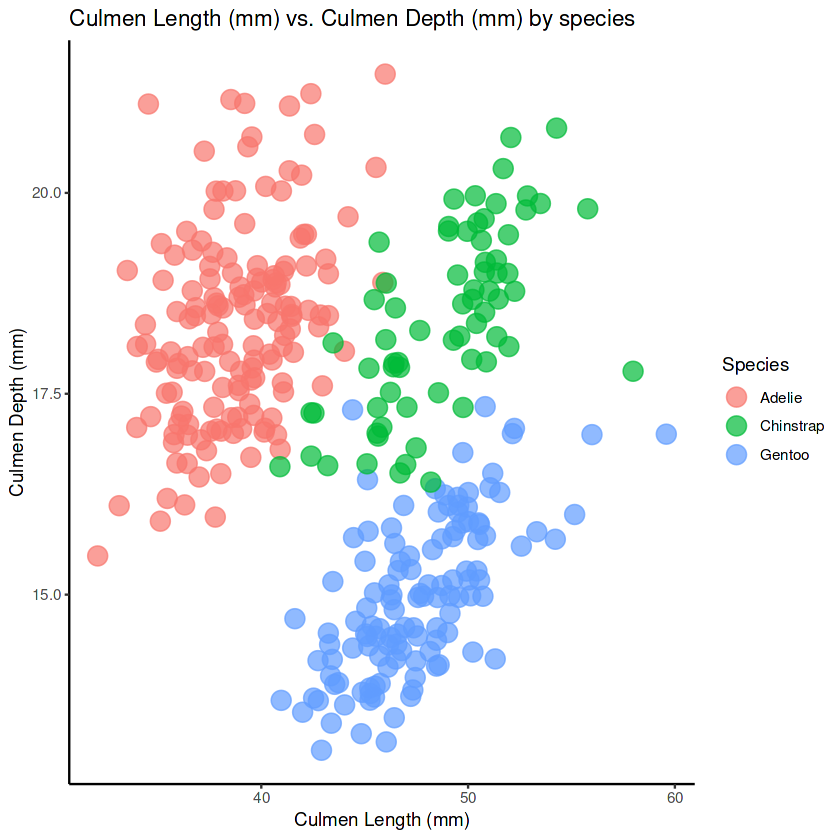

In [13]:
library(ggplot2)

# Update x-axis labels 
penguins_clean$species <- factor(penguins_clean$species, 
                                 labels = c("Adelie", 
                                            "Chinstrap", 
                                            "Gentoo"))

# Scatter plot culmen_length_mm x culmen_depth_mm color by species
posn_j <- position_jitter(0.1,
                          seed = 666)
ggplot(penguins_clean,
       aes(x = culmen_length_mm,
           y = culmen_depth_mm,
           color = species)) +
  geom_point(position = posn_j, alpha = 0.7, size = 5) +
  labs(title="Culmen Length (mm) vs. Culmen Depth (mm) by species",
       x = "Culmen Length (mm)",
       y = "Culmen Depth (mm)") +
  scale_color_discrete("Species") +
  theme_classic()

## Scatter plot interpretation
The scatter plot (Figure 1) examines the relationship between culmen length and depth, showing clear differentiation among species. Adelie penguins tend to have shorter, deeper culmens, while Gentoo penguins exhibit longer, shallower beaks, possibly reflecting diverse feeding strategies.


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


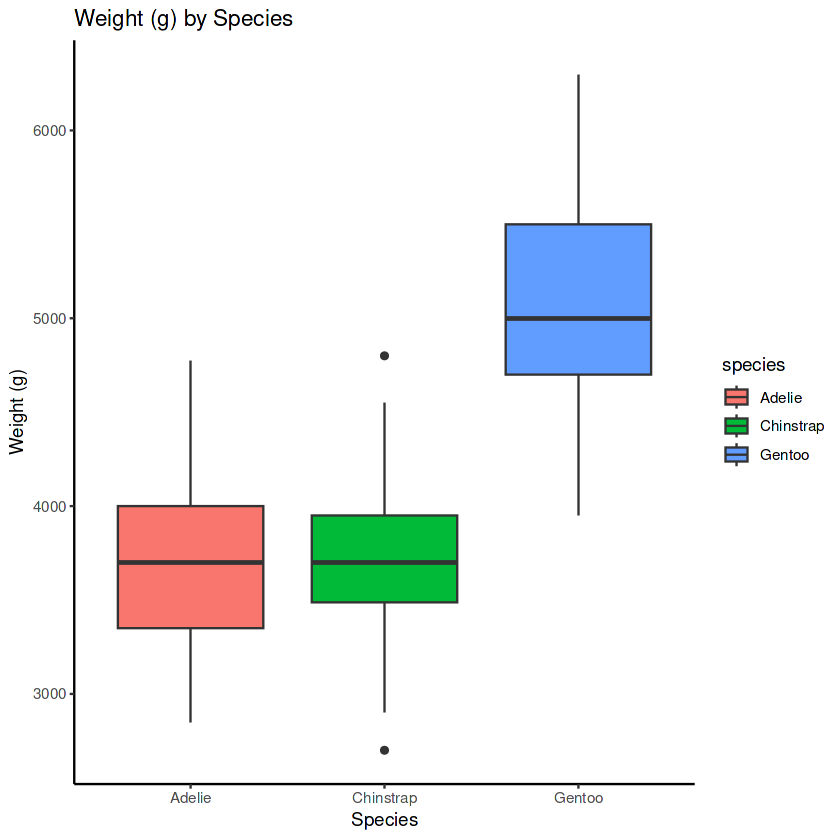

In [14]:
# Boxplot of body mass by species
ggplot(penguins_clean, 
       aes(x=species, 
           y=body_mass_g, 
           fill=species)) +
  geom_boxplot() +
  labs(title = "Weight (g) by Species", 
       x = "Species", 
       y = "Weight (g)") +
  theme_classic()

## Box plot Interpretation
The box plot of body mass by species indicates a higher median body mass for Gentoo penguins, with their box and whiskers suggesting greater variation in mass. Notable outliers in the Chinstrap data suggest individual variations or data recording anomalies.


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


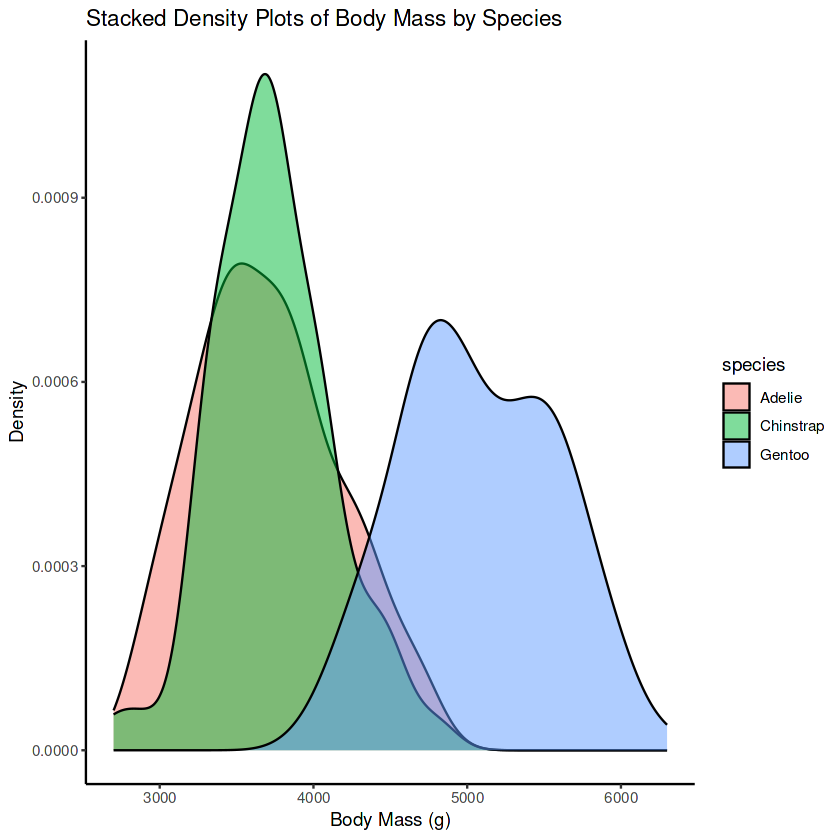

In [15]:
# Stacked density plots of body_mass_g colored by species
ggplot(penguins_clean, aes(x=body_mass_g, fill=species)) +
  geom_density(alpha = 0.5) +
  labs(title = "Stacked Density Plots of Body Mass by Species", x = "Body Mass (g)", y = "Density") +
  theme_classic() +
  scale_y_continuous(labels = scales::comma)

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


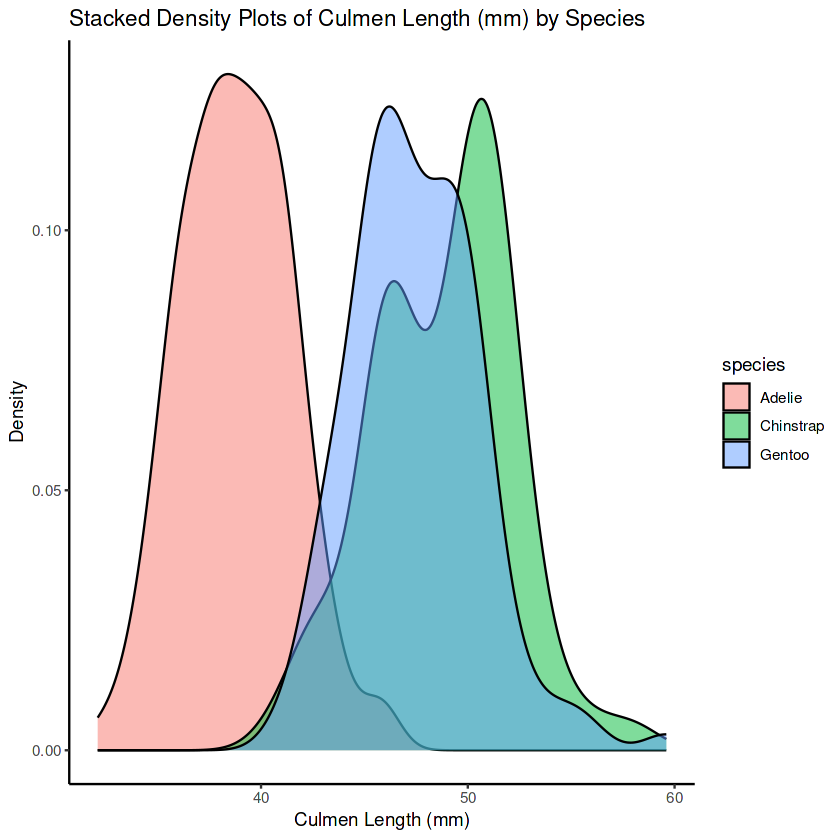

In [16]:
# Stacked density plots of culmen_length_mm colored by species
ggplot(penguins_clean, aes(x=culmen_length_mm, fill=species)) +
  geom_density(alpha = 0.5) +
  labs(title = "Stacked Density Plots of Culmen Length (mm) by Species", x = "Culmen Length (mm)", y = "Density") +
  theme_classic() +
  scale_y_continuous(labels = scales::comma)

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


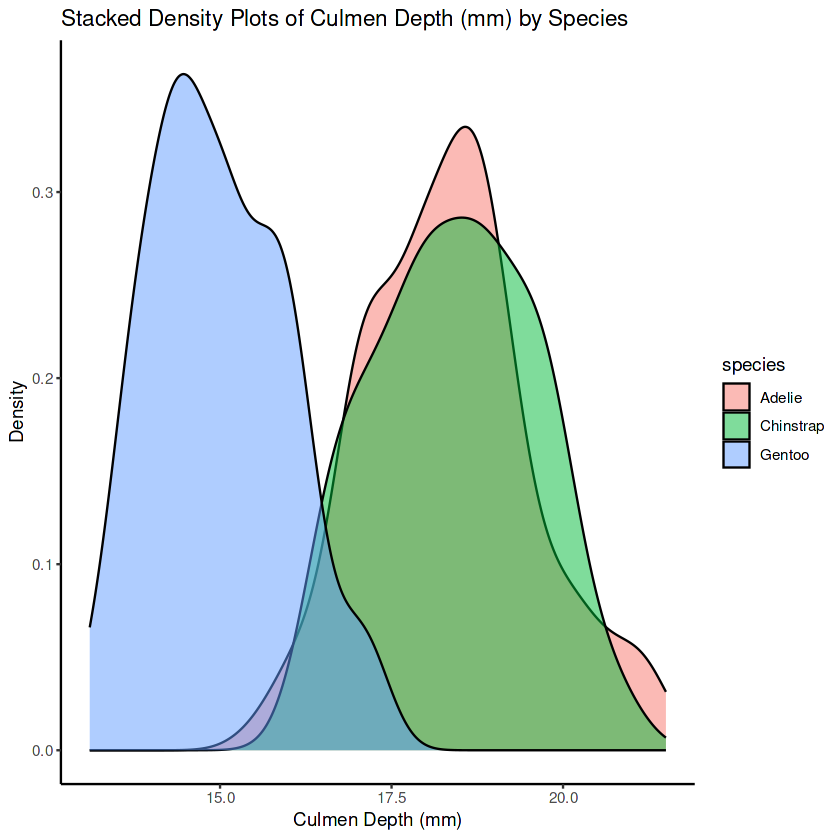

In [17]:
# Stacked density plots of culmen_depth_mm colored by species
ggplot(penguins_clean, aes(x=culmen_depth_mm, fill=species)) +
  geom_density(alpha = 0.5) +
  labs(title = "Stacked Density Plots of Culmen Depth (mm) by Species", x = "Culmen Depth (mm)", y = "Density") +
  theme_classic() +
  scale_y_continuous(labels = scales::comma)

## Stacked Density Plot Interpretation

Stacked density plots for body mass, culmen length, and culmen depth reveal overlapping distributions, indicating a shared environmental influence on body mass, while the distinct peaks for culmen length underscore species-specific evolutionary traits.


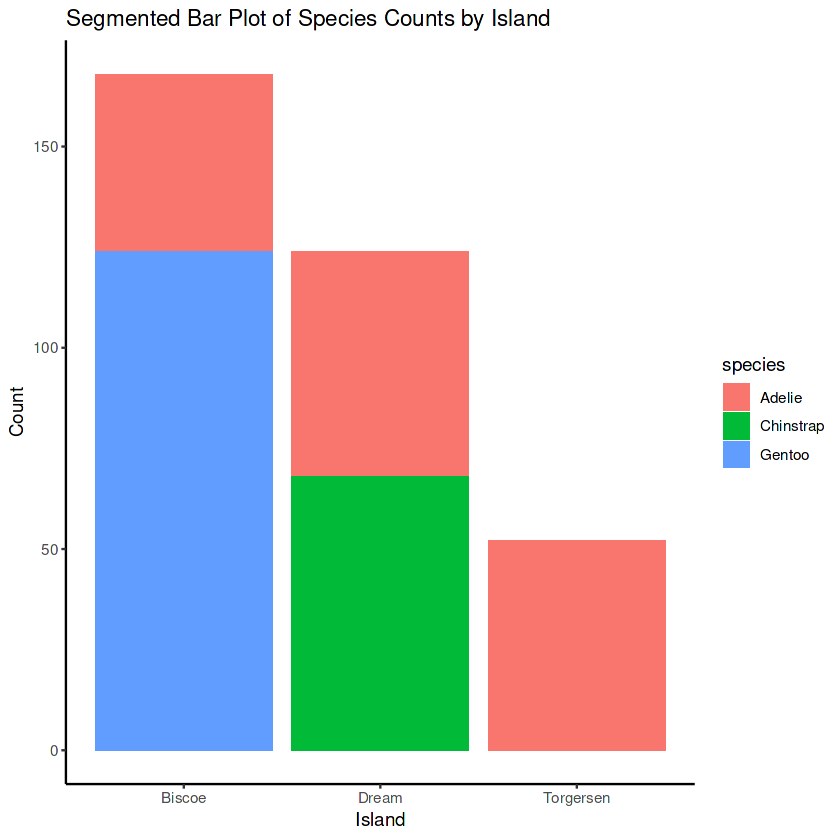

In [18]:
# Segmented bar plot of species by island
ggplot(penguins_clean, aes(x = island, fill = species)) +
  geom_bar(position = "stack") +
  labs(title = "Segmented Bar Plot of Species Counts by Island", x = "Island", y = "Count") +
  theme_classic()

## Segmented Bar Plot Discussion
The segmented bar plot displays species prevalence by island. The higher count of Adelie penguins on Torgersen contrasts with a more balanced distribution on Biscoe, suggesting habitat preferences or competitive displacement.

## Conclusions from Data Visualization
In conclusion, the visual data analyzed paints a compelling picture of the unique evolutionary trajectories undertaken by the Adelie, Chinstrap, and Gentoo penguins. The distinctions in culmen dimensions and body mass among these species not only reflect their specialized ecological niches but also their adaptability to the dynamic Antarctic environment. These biometric variations may influence foraging strategies, reproductive success, and interspecies competition. Looking forward, these insights prompt further inquiry into the resilience of these species amidst climatic shifts, guiding conservation efforts and enhancing our understanding of Antarctic biodiversity's fragility. Moreover, the biometric data studied could act as a sentinel for broader environmental changes, anchoring future ecological and environmental research. Through such studies, we can better predict and mitigate the impacts of global environmental changes on these emblematic avian species.


# Week 4 - Evaluating Numeric Variables
First, we examined the distributions of all of the numeric variables in the dataset: `body_mass_g`, `culmen_depth_mm`,`culmen_length_mm`, `delta_13_c`,`delta_15_n`, and `flipper_length_m`. 

Applying the Empirical Rule to any of these variables requires that the variable be approximately symmetrical in its distribution.

None of these variables appear to meet this criterion.

Warning message:
“Removed 35 rows containing non-finite outside the scale range (`stat_bin()`).”


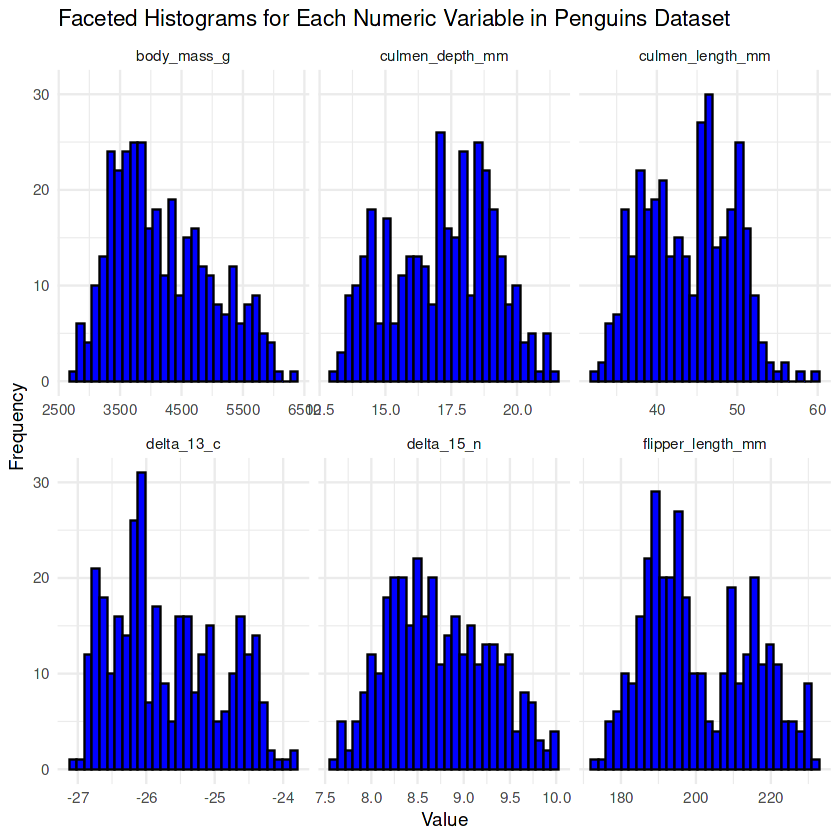

In [20]:
# Which numerical variables have an approximately symmetric distribution?
# Subsetting penguins_clean by only columns with numerical data
penguins_numeric <- penguins_clean[sapply(penguins_clean, is.numeric)]
# str(penguins_numeric)

# Apply the Empirical Rule to one of the approximately symmetric numerical 
# data values in your data set. If none of your numerical data values are 
# approximately symmetric, state this in your written analysis.

# Reshape the data
penguins_long <- penguins_numeric %>%
  pivot_longer(cols = -sample_number, names_to = "variable", values_to = "value")

# Create faceted histograms for each variable in penguins_numeric
ggplot(penguins_long, aes(x = value)) +
  geom_histogram(bins = 30, fill = 'blue', color = 'black') +
  facet_wrap(~ variable, scales = 'free_x') +
  theme_minimal() +
  labs(title = 'Faceted Histograms for Each Numeric Variable in Penguins Dataset',
       x = 'Value',
       y = 'Frequency')
##### The Empirical Rule does not apply to any of these variables.

## Body Mass (g) Histogram
The histogram for body mass appears to be roughly unimodal and slightly
right-skewed, indicating that most penguins have a body mass around the center of
the distribution with fewer penguins having higher body masses. The empirical rule,
which states that approximately 68%, 95%, and 99.7% of the data fall within one,
two, and three standard deviations from the mean, respectively, assumes a normal
distribution. Given the skewness observed, the empirical rule may not strictly apply
here.

## Culmen Depth (mm) Histogram
The culmen depth shows a bimodal distribution with two distinct peaks. This
suggests there are possibly two different subgroups within the penguin population
with different average culmen depths. Since the distribution is not normal and has
multiple peaks, the empirical rule would not be appropriate for this variable.

## Culmen Length (mm) Histogram
Similar to culmen depth, the culmen length is also bimodal, which suggests
the presence of two subgroups with different culmen lengths. The bimodal nature
again indicates that the empirical rule would not be appropriate here.

## Delta 13 C (‰) Histogram
The distribution of delta 13 C appears multimodal with multiple peaks, which
might indicate the presence of different dietary or environmental subgroups within
the penguins. Multimodal distributions are not suitable for the application of the
empirical rule, as it does not follow a normal distribution pattern.

## Delta 15 N (‰) Histogram
This histogram is also multimodal, similar to delta 13 C, which suggests complexity
in the data that might be related to different feeding habits or habitats. The
empirical rule cannot be applied due to the lack of a normal distribution.

## Flipper Length (mm) Histogram
The histogram for flipper length appears unimodal with a slight skew. There is
one prominent peak, and the data tails off as flipper length increases. While there is
a single peak, the skewness might still pose an issue for the empirical rule, although
this variable might be the best candidate for its application compared to the others
if one considers applying some skewness correction.

In summary, the empirical rule is most useful for data that are symmetrically
distributed and bell-shaped (normal distribution). In these histograms, many of the
variables show signs of bimodal or multimodal distributions, which suggests that different subpopulations exist within the data. The empirical rule does not apply well to such distributions.

## Chebyshev’s Rule Applied to Culmen Length (mm)
Chebyshev's Rule, also known as Chebyshev's Inequality, is a statistical rule
that provides a lower bound on the probability that a random variable lies within a
certain number of standard deviations from the mean. Specifically, for any real
number $K>1$, at least $(1−1/k^2)$ of the values lie within $k$ standard deviations of the
mean. This rule applies to any probability distribution, regardless of its shape. By
Chebyshev's Rule, at least 75 % of the penguins' culmen lengths are between 33
mm and 54.8 mm.


In [21]:
# Function to apply Chebyshev's Rule to culmen_length_mm
# Calculate the mean and standard deviation for culmen_length_mm
mean_culmen_length <- mean(penguins_numeric$culmen_length_mm, na.rm = TRUE)
sd_culmen_length <- sd(penguins_numeric$culmen_length_mm, na.rm = TRUE)

# Define k for Chebyshev's inequality (e.g., k = 2 for 75%)
k <- 2

# Calculate the range using Chebyshev's inequality
minus_k_sd <- round(mean_culmen_length - k*sd_culmen_length, 1)
plus_k_sd <- round(mean_culmen_length + k*sd_culmen_length, 1)
percent <- (1 - 1/k^2)*100

cat("By Chebyshev's Rule, at least", percent, "% of the penguins' culmen lengths 
    are between", minus_k_sd, "and", plus_k_sd, ".")

By Chebyshev's Rule, at least 75 % of the penguins' culmen lengths 
    are between 33 and 54.8 .

## Outlier Detection Using Z-scores

To determine if there are any outliers in the dataset, we can calculate the 
z-scores for each numerical variable in the `penguins_numeric` dataset. 
A z-score indicates how many standard deviations an element is from the mean. 
A common threshold for identifying outliers is a z-score of 
greater than 3 or less than -3. The R script below evaluated Z-scores for `flipper_length_mm`,
`culmen_depth_mm`, and `body_mass_g`. None of these variables had any outliers
+/- 3 standard deviations from the mean.

In [23]:
# Calculate z-score for flipper_length_mm
df$z_flipper_length_mm <- (df$flipper_length_mm - mean(df$flipper_length_mm))/sd(df$flipper_length_mm)
zdf_flipper_length_mm <- df %>% filter(z_flipper_length_mm > 3 | z_flipper_length_mm < -3)
outliers_flipper_length_mm <- zdf_flipper_length_mm$flipper_length_mm
## There are no outliers in flipper_length_mm.

# Calculate z-scores for 'culmen_depth_mm'
df$z_culmen_depth_mm <- (df$culmen_depth_mm - mean(df$culmen_depth_mm)) / sd(df$culmen_depth_mm)
zdf_culmen_depth_mm <- df %>% filter(z_culmen_depth_mm > 3 | z_culmen_depth_mm < -3)
outliers_culmen_depth_mm <- zdf_culmen_depth_mm$culmen_depth_mm
## There are no outliers for culmen_depth_mm

# Calculate Z-score for body_mass_g
df$z_body_mass_g <- (df$body_mass_g - mean(df$body_mass_g)) / sd(df$body_mass_g)
zdf_body_mass_g <- df %>% filter(z_body_mass_g > 3 | z_body_mass_g < -3)
outliers_body_mass_g <- zdf_body_mass_g$body_mass_g
## There are no outliers for body_mass_g

## Coefficient of Variation Comparison
The coefficient of variation (CV) is a statistical measure of the dispersion of
data points in a data series around the mean. It is calculated as the ratio of the
standard deviation to the mean, and it is often expressed as a percentage. The CV is
useful because it allows for comparison of the variability of different datasets with
different units or means. We will calculate the CV for two or more numerical
variables from the `penguins_numeric` dataset and compare their variability.
The coefficients of variation (CV) for the variables `culmen_length_mm`,
`flipper_length_mm`, and `body_mass_g` from the `penguins_numeric` dataset are
12.43%, 6.999%, and 19.086% respectively. Here's what these values indicate
about the variability of each measurement:
* `Culmen Length (mm)`: With a CV of 12.43%, this suggests that the culmen
length measurements have a moderate level of variability relative to the
mean culmen length. This means that while there is some variation in culmen
length among the penguins, it is not excessively high.
* `Flipper Length (mm)`: The CV of 6.99% for flipper length indicates that this
variable has relatively low variability compared to its mean. This implies that
the flipper lengths of the penguins are quite consistent, with less variation
from the average flipper length.
* `Body Mass (g)`: The body mass has a CV of 19.086%, which is higher than the
other two variables. This higher CV suggests that there is a greater level of variability in the body mass of the penguins. In other words, the weights of
the penguins are more spread out from the average weight, indicating a
wider range of body mass values within the dataset.
In summary, the CV provides a standardized measure of variability that is
independent of the unit of measurement. By comparing the CVs, we can conclude
that the body mass of the penguins is the most variable trait among the three, while
flipper length is the least variable.

In [26]:
# Coefficient of Variation Comparison
coefficient_of_variation <- function(x) {
  (sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE)) * 100
}

# Select variables to compare
selected_variables <- c('culmen_length_mm', 'flipper_length_mm', 'body_mass_g')

# Calculate CV for each selected variable
cv_values <- round(sapply(penguins_numeric[selected_variables], coefficient_of_variation), 3)

# Output the CV values
cv_values

culmen_length_mm flipper_length_mm       body_mass_g 
           12.430             6.999            19.086

# Week 5 - Probability and Expected Value
I determined that the expected flipper length (mm) for a
penguin in this study is 201 millimeters.
Based on this dataset:
* The probability a penguin is the species Adelie is 0.442.
* The probability a penguin is the species Chinstrap is 0.198.
* The probability a penguin is the species Gentoo is 0.36.


In [27]:
df <- penguins_clean

# Find the expected value of flipper_length_mm
flipper_df <- data.frame(table(df$flipper_length_mm))
flipper_lengths <- as.numeric(as.character(flipper_df$Var1))
probabilities <- flipper_df$Freq/sum(flipper_df$Freq)
sum(probabilities) # should be 1

expected_flipper_length <- round(sum(flipper_lengths*probabilities), 0)
cat("The expected flipper length of a penguin from this study is", expected_flipper_length, 'millimeters.')

# Find the probability of each outcome of the species variable
species_df <- data.frame(table(df$species))
species <- as.character(species_df$Var1)
probabilities <- round(species_df$Freq/sum(species_df$Freq), 3)
sum(probabilities) # should be 1

for (i in 1:3){
  cat("The probability a penguin is the species", species[i], "is", probabilities[i],".")
}

[1] 1

The expected flipper length of a penguin from this study is 201 millimeters.

[1] 1

The probability a penguin is the species Adelie is 0.442 .The probability a penguin is the species Chinstrap is 0.198 .The probability a penguin is the species Gentoo is 0.36 .

# Week 6 - Discrete Probability Distribution of Penguin Weights

I created a discrete probability distribution and histogram for
the weights of penguins in the `PalmerPenguins` dataset. The mean weight in the
data is approximately equal to 4202 grams, with $P(4202)$ approximately equal to
3.5%. The probabilities and weights are not normally distributed.

In [29]:
library(gt)
library(scales)

# Discrete Probability Distribution for Heights

# Find the probability of each weight (body_mass_g)
weights_freq_distribution <- data.frame(table(df$body_mass_g))
weights <- as.numeric(as.character(weights_freq_distribution$Var1))
probabilities <- round(weights_freq_distribution$Freq/sum(weights_freq_distribution$Freq),4)
sum(probabilities) #should sum to 1 

# Construct a discrete probability distribution of heights
weights_discrete_prob_distribution <- data.frame(weights,probabilities)

# Nice print out of discrete probability distribution
# weights_discrete_prob_distribution %>% gt()

[1] 0.9984

## Graphs of Discrete Probability Distribution of Penguin Weights

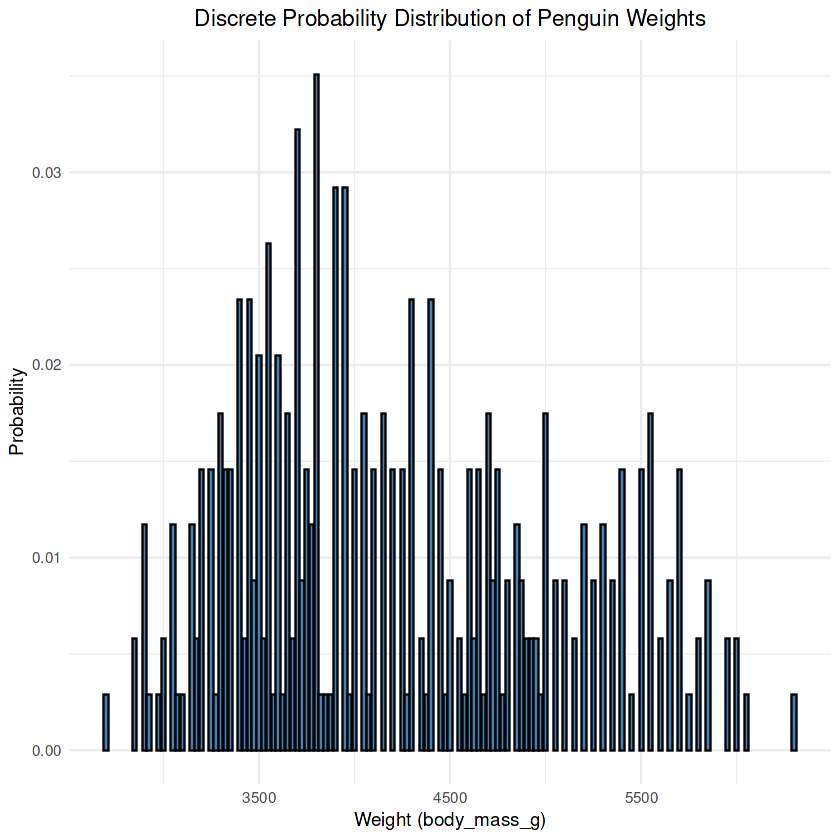

In [30]:
# Graph of discrete probability distribution
ggplot(weights_discrete_prob_distribution, aes(x=weights, y=probabilities)) + 
  geom_col(fill = "steelblue", color = "black") + # Use geom_col() for bar plots of pre-summarized data
  labs(title = "Discrete Probability Distribution of Penguin Weights",
       x = "Weight (body_mass_g)",
       y = "Probability") +
  theme_minimal() + # Cleaner theme
  theme(plot.title = element_text(hjust = 0.5)) # Center the plot title

Since this initial visualization is a little challenging to interpret, I also created a
density plot of weight (`body_mass_g`) across the dataset.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


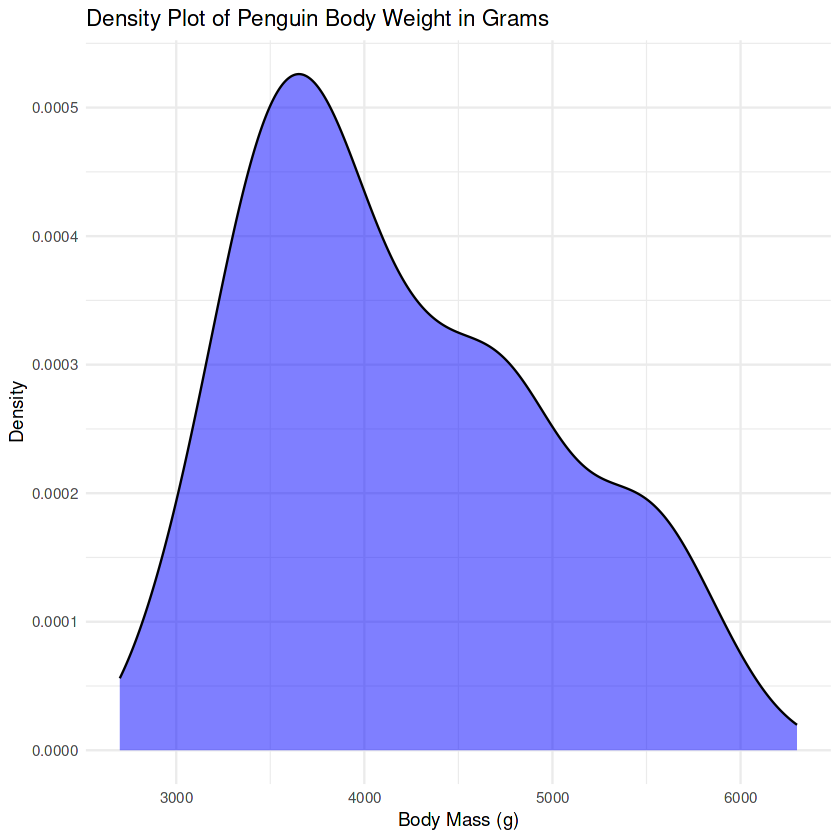

In [34]:
# Cleaner density plot visualization
ggplot(df, aes(x = body_mass_g)) + 
  geom_density(fill = "blue", alpha = 0.5) +
  scale_y_continuous(labels = scales::comma) +
  xlab("Body Mass (g)") + 
  ylab("Density") +
    theme_minimal() +
  ggtitle("Density Plot of Penguin Body Weight in Grams")
    

## Binomial Probability Distribution and Histogram for Species Adelie

[1] 1

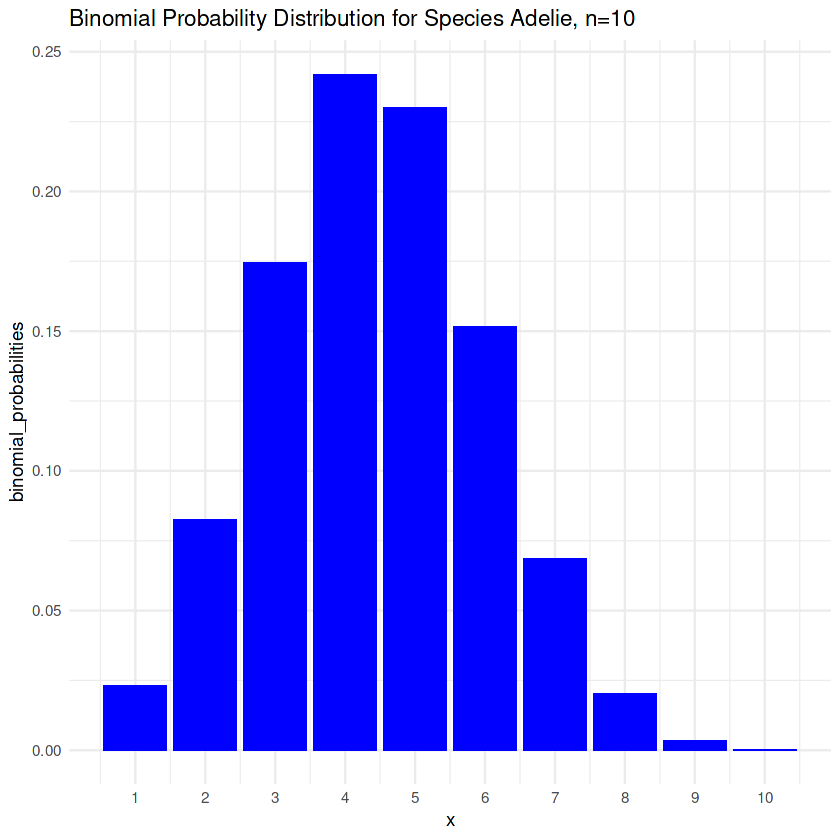

In [35]:
#Binomial Probability Distribution  for Species

#Find the probability a penguin is species Adelie (one trial)
p <- sum(df$species == "Adelie")/ length(df$species)

#Find the probability a penguin is not species Adelie (one trial)
q <- sum(df$species != "Adelie")/ length(df$species)

#Check that  p + q = 1
p + q

#Find binomial probabilities that if n penguins are selected at random,
# exactly x of them will be Adelie species

x <- 1:10
n <- 10
binomial_probabilities <- round(dbinom(x,n,p),4)

#Construct binomial probability distribution
species_binomial_prob_distribution <- data.frame(x, binomial_probabilities) 

#Nice print our of binomial probability distribution
#species_binomial_prob_distribution %>% gt() 

breaks <- c(0:n)
ggplot(species_binomial_prob_distribution, aes(x, y=binomial_probabilities)) + 
  geom_bar(stat = "identity", fill = "blue") + 
  scale_x_continuous(breaks = breaks) +
  ggtitle("Binomial Probability Distribution for Species Adelie, n=10") +
    theme_minimal()

## Binomial Probability Distribution Interpretation

* The histogram visualizes the data from the table, with the x-axis representing
the number of successes and the y-axis representing the probability of that
number of successes.

* Each bar's height corresponds to the probability of that number of successes
occurring. For instance, the tallest bar at $x=4$ corresponds to the highest
probability (about 0.2420) among the probabilities listed in the table,
meaning that observing exactly 4 successes is the most probable outcome
within this dataset.

* This visualization is particularly useful in showing the distribution of
probabilities across different numbers of successes. It provides a quick way to
see which outcomes are most and least likely and how the probabilities are
distributed (e.g., if they are skewed towards lower or higher numbers of
successes).

* This kind of analysis is valuable for understanding variability and the
likelihood of different outcomes within a population. For researchers, it can
inform predictions about the Adelie species and contribute to broader
ecological and biological studies.

# Week 7 - Evaluating Penguin Weights for Normality

The following Q-Q plot and density plot with superimposed normal distribution clearly demonstrate that penguin weights in this data are not normally distributed.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_qq()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_qq_line()`).”


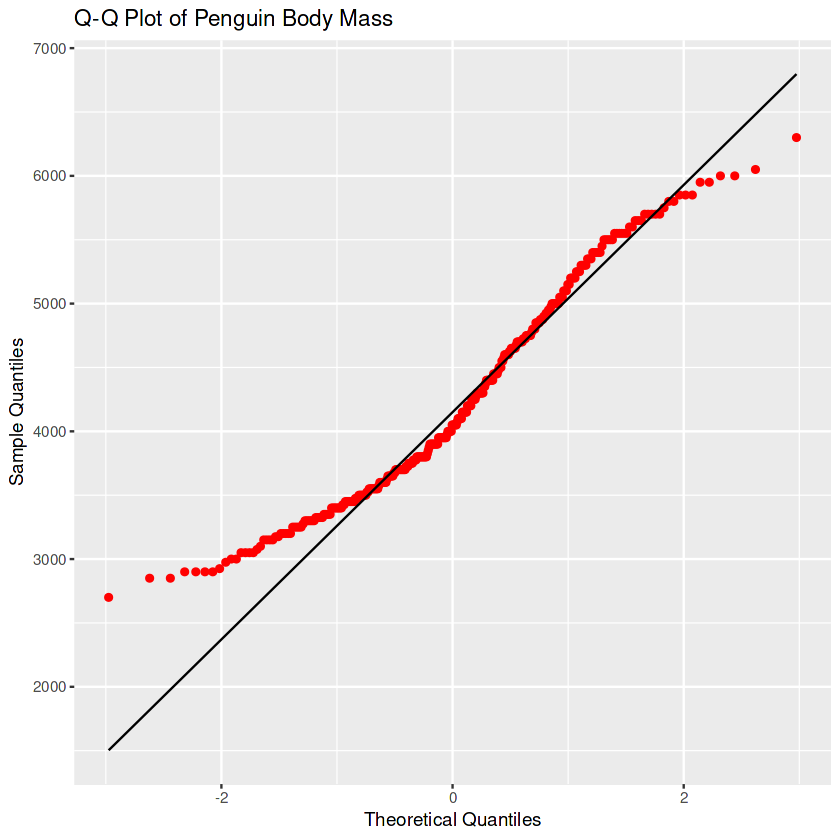

In [36]:
# Construct a Q-Q plot for body_mass_g
qq_plot <- ggplot(df, aes(sample = body_mass_g)) +
  stat_qq(color = "red") +
  stat_qq_line() +
  ggtitle('Q-Q Plot of Penguin Body Mass') +
  xlab('Theoretical Quantiles') +
  ylab('Sample Quantiles')

# Display the Q-Q plot
print(qq_plot)

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


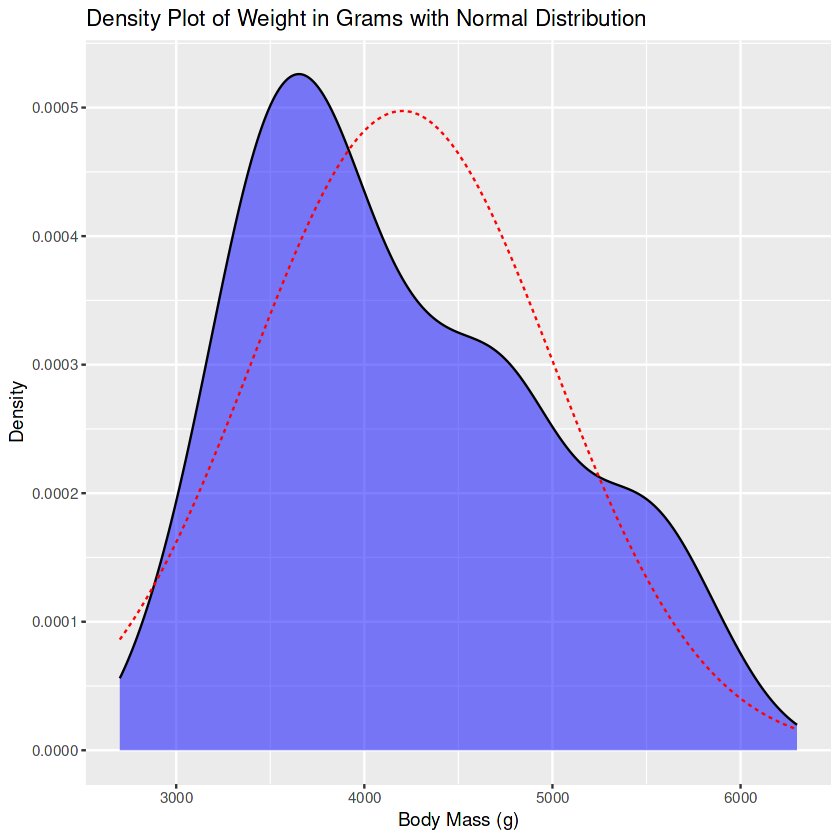

In [37]:
# Calculate mean and standard deviation of body_mass_g
body_mass_stats <- df %>%
  summarise(mean_mass = mean(body_mass_g, na.rm = TRUE),
            sd_mass = sd(body_mass_g, na.rm = TRUE))

# Extract the mean and standard deviation
mean_mass <- body_mass_stats$mean_mass
sd_mass <- body_mass_stats$sd_mass

# Density plot with superimposed normal distribution
ggplot(df, aes(x = body_mass_g)) + 
  geom_density(fill = "blue", alpha = 0.5) +
  stat_function(fun = dnorm, args = list(mean = mean_mass, sd = sd_mass), color = "red", linetype = "dashed") +
  scale_y_continuous(labels = scales::comma) +
  xlab("Body Mass (g)") + 
  ylab("Density") +
  ggtitle("Density Plot of Weight in Grams with Normal Distribution")

## Normal Approximation to Binomial Distribution for Species

I made a binomial probability distribution (and histogram) for the species Adelie. This shows the probabilities of the first 1-
30 penguins selected being the species Adelie. Increasing the number to 30 more
closely approximates the normal distribution than 10.


[1] 1

np = 13.25581 >= 10nq = 16.74419 >= 10

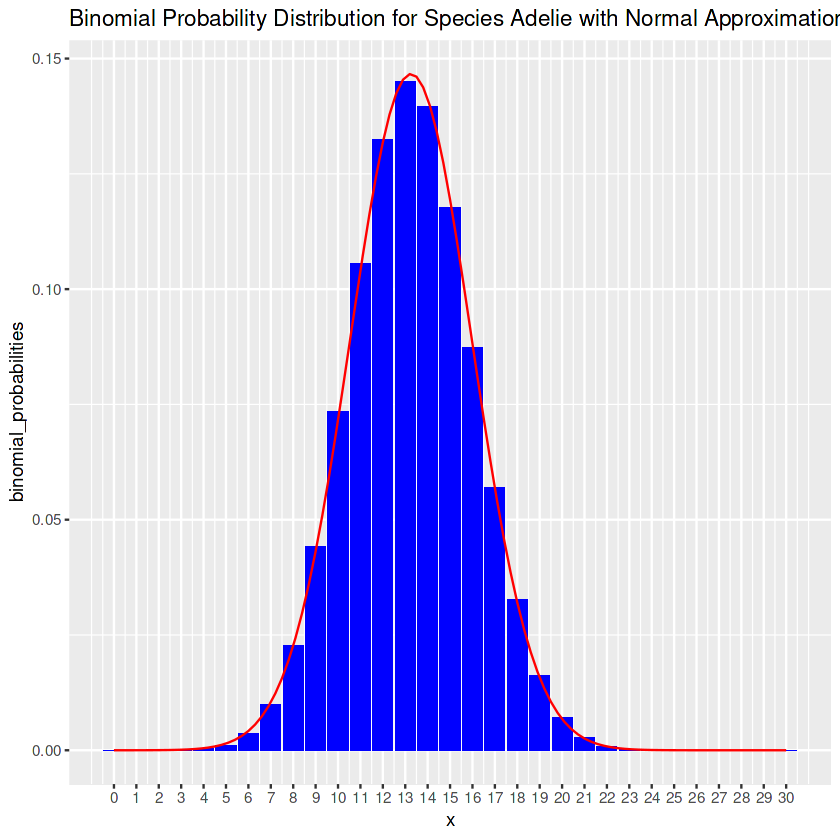

In [38]:
# Find the probability a penguin is species Adelie (one trial)
p <- sum(df$species == "Adelie") / length(df$species)

# Find the probability a penguin is not species Adelie (one trial)
q <- sum(df$species != "Adelie") / length(df$species)

# Check that p + q = 1
p + q

# Find binomial probabilities that if n penguins are selected at random,
# exactly x of them will be Adelie, where np >= 10 and nq >= 10.
n <- 30
x <- 0:n
np <- n * p
nq <- n * q
cat('np =', np, '>= 10')
cat('nq =', nq, '>= 10')

binomial_probabilities <- round(dbinom(x, n, p), 4)

# Construct binomial probability distribution
species_binomial_prob_distribution <- data.frame(x, binomial_probabilities)

# Superimpose a normal distribution
mean_binom <- n * p
sd_binom <- sqrt(n * p * q)

ggplot(species_binomial_prob_distribution, aes(x, y = binomial_probabilities)) + 
  geom_bar(stat = "identity", fill = "blue") +  # Make it blue
  stat_function(fun = dnorm, args = list(mean = mean_binom, sd = sd_binom), color = "red") +
  scale_x_continuous(breaks = 0:n) +
  ggtitle("Binomial Probability Distribution for Species Adelie with Normal Approximation")

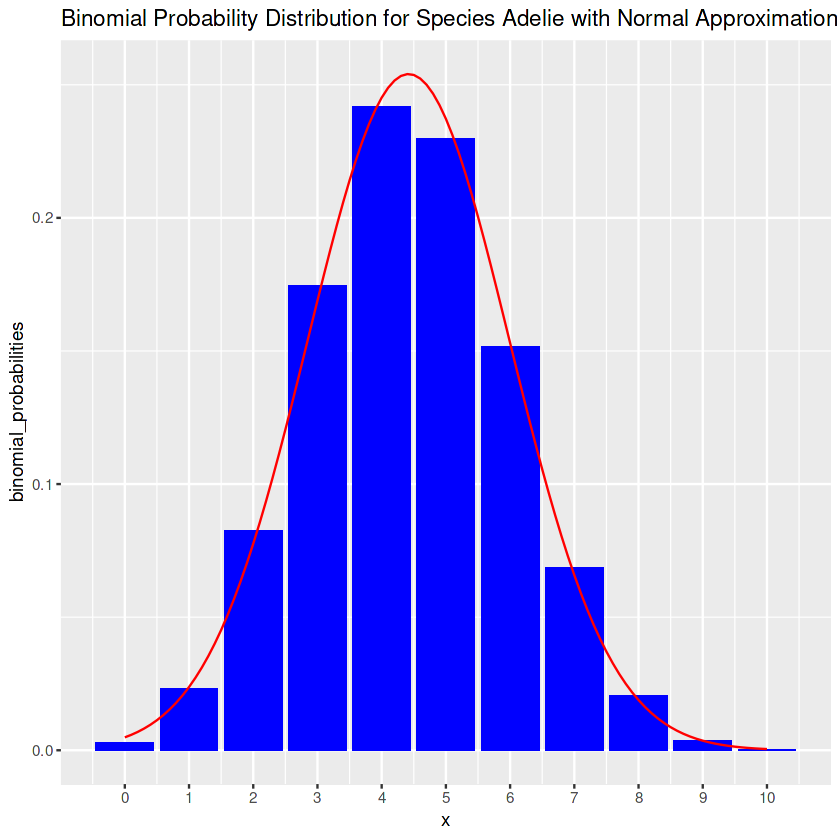

In [39]:
# Find binomial probabilities that if n penguins are selected at random,
# exactly x of them will be Adelie species
x <- 0:10
n <- 10
binomial_probabilities <- round(dbinom(x, n, p), 4)

# Construct binomial probability distribution
species_binomial_prob_distribution <- data.frame(x, binomial_probabilities)


breaks <- c(0:n)
mean_binom <- n * p
sd_binom <- sqrt(n * p * q)

ggplot(species_binomial_prob_distribution, aes(x, y = binomial_probabilities)) + 
  geom_bar(stat = "identity", fill = "blue") + 
  stat_function(fun = dnorm, args = list(mean = mean_binom, sd = sd_binom), color = "red") +
  scale_x_continuous(breaks = breaks) +
  ggtitle("Binomial Probability Distribution for Species Adelie with Normal Approximation")

## Interpretation of Probability Distributions
* The histogram visualizes the data from the table, with the x-axis representing
the number of successes and the y-axis representing the probability of that
number of successes.
* Each bar's height corresponds to the probability of that number of successes
occurring. For instance, the tallest bar at $x=13$ corresponds to the highest
probability (about 0.14) among the probabilities listed in the table, meaning
that observing exactly 13 successes is the most probable outcome within this
dataset.
* This visualization is particularly useful in showing the distribution of
probabilities across different numbers of successes. It provides a quick way to
see which outcomes are most and least likely and how the probabilities are
distributed (e.g., if they are skewed towards lower or higher numbers of
successes).

# Week 8 - Sampling Distribution of Sample Mean Weight

* I made a sampling distribution of sample means for samples of size $n = 500$ for the
weights of the penguins in the PalmerPenguins dataset. See below for the graph
of the distribution (red) with a superimposed normal curve (blue). The sampling
distribution of sample means is approximately normal. This is confimed by the
normal QQ plot.
* The population mean weight is $\mu = 4201.754$ with standard deviation of $\sigma = 801.9545$. The expected mean of the sample means is $\mu_x = \mu = 4201.754$ with standard error $\sigma_x = \sigma/\sqrt{n} = 146.4162$. The actual mean of the sample means is $\mu_x = 4202.233$ with standard error $\sigma_x = 143.2586$.
* These results support the conclusions of the Central Limit Theorem.

## Sampling Distribution of Sample Means for `weight`

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


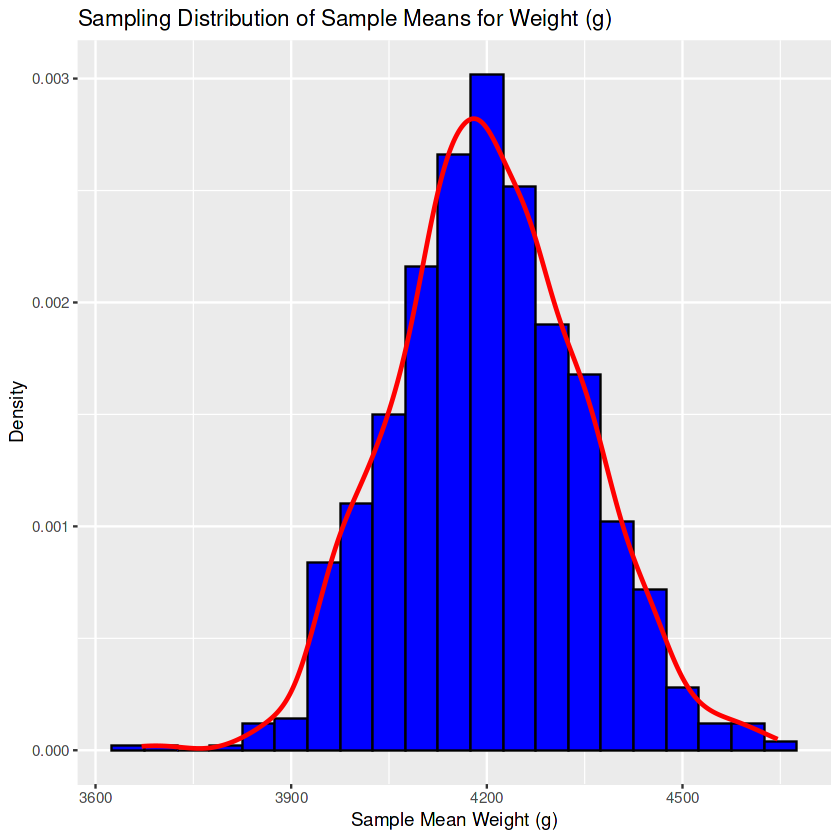

The population mean weight is: 4201.754 with standard deviation 801.9545 .The expected mean of the sample means is: 4201.754 with standard error 146.4162 .The actual mean of the sample means is: 4202.233 with standard error 143.2586 .

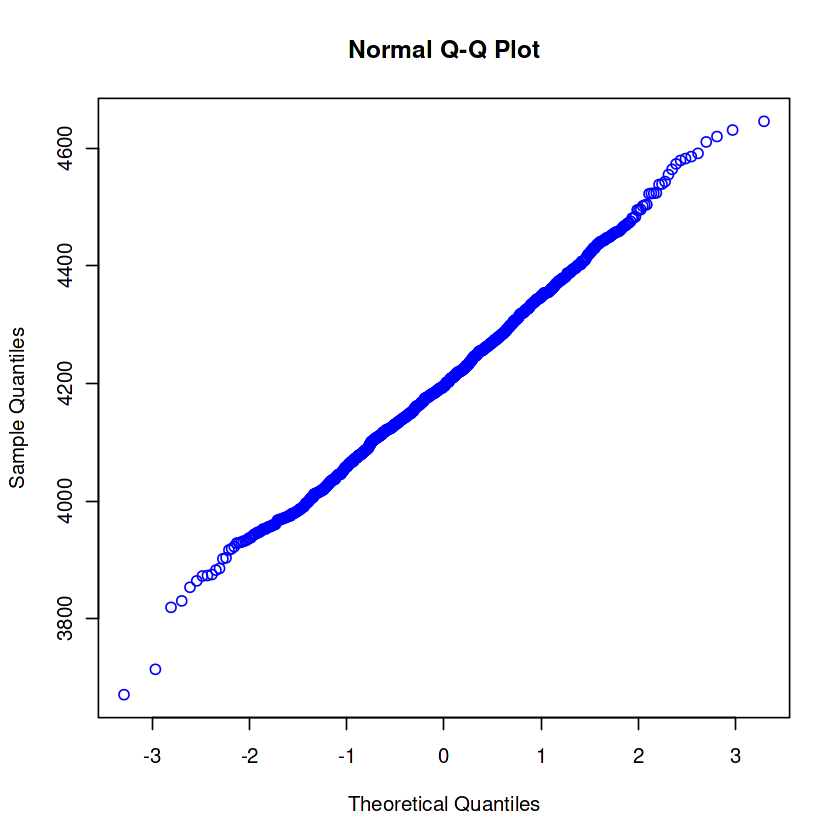

In [41]:
### First, I am making a minor change to the dataset this week.
# Rename "body_mass_g" to "weight"
df$weight <- df$body_mass_g

df$body_mass_g <- NULL

set.seed(666) # for reproducibility

mu <- mean(df$weight, na.rm = TRUE) #population mean
sigma <- sd(df$weight, na.rm = TRUE) #population standard deviation

# Number of samples and sample size
msm <- 1000 # number of samples means
nsm <- 30 # sample size means

# Initialize a vector to store the sample means
sample_means <- numeric(msm)

# Loop to draw samples and compute means
for (i in 1:msm) {
  sample <- sample(df$weight, nsm, replace = TRUE)
  sample_means[i] <- mean(sample, na.rm = TRUE)
}

expected_mu_xbar <- mu  #expected mean of sample means
expected_sigma_xbar <- sigma/sqrt(nsm) #expected standard error of sample means

actual_mu_xbar <- mean(sample_means, na.rm = TRUE)  #actual mean of sample means
actual_sigma_xbar <- sd(sample_means, na.rm = TRUE)  #actual standard error of sample means

# Create a dataframe for the sampling distribution
sampling_distribution <- data.frame(sample_means = sample_means)

# Plot the sampling distribution
ggplot(sampling_distribution, aes(x = sample_means)) +
  geom_histogram(aes(y = ..density..), binwidth = 50, color = "black", fill = "blue") +
  geom_density(color = "red", size = 1) +
  ggtitle("Sampling Distribution of Sample Means for Weight (g)") +
  xlab("Sample Mean Weight (g)") +
  ylab("Density")

qqnorm(sample_means, col = "blue")

cat('The population mean weight is:', mu, 'with standard deviation', sigma,'.')
cat('The expected mean of the sample means is:', expected_mu_xbar, 'with standard error', expected_sigma_xbar,'.')
cat('The actual mean of the sample means is:', actual_mu_xbar, 'with standard error', actual_sigma_xbar,'.')

## Sampling Distribution of Sample Proportions for Species Adelie
* I made a sampling distribution of sample proportions for samples of size $n = 500$ for
the proportion of the players in the PalmerPenguins dataset that are species Adelie.
See below for the graph of the distribution (red) with a superimposed normal
curve (blue). The sampling distribution of sample proportions is approximately
normal. This is confimed by the normal QQ plot.
* The population proportion of Adelie penguins is $p = 0.4418605$.
* The expected mean of the sample proportions is $\mu_p = p = 0.4418605$ with standard error $\sigma_p = \sqrt{\frac{pq}{n}} = 0.022209$.
* The actual mean of the sample proportion is $\mu^p = 0.4417294$ with standard error $\sigma_p = 0.02191825$.
* My results are as expected.

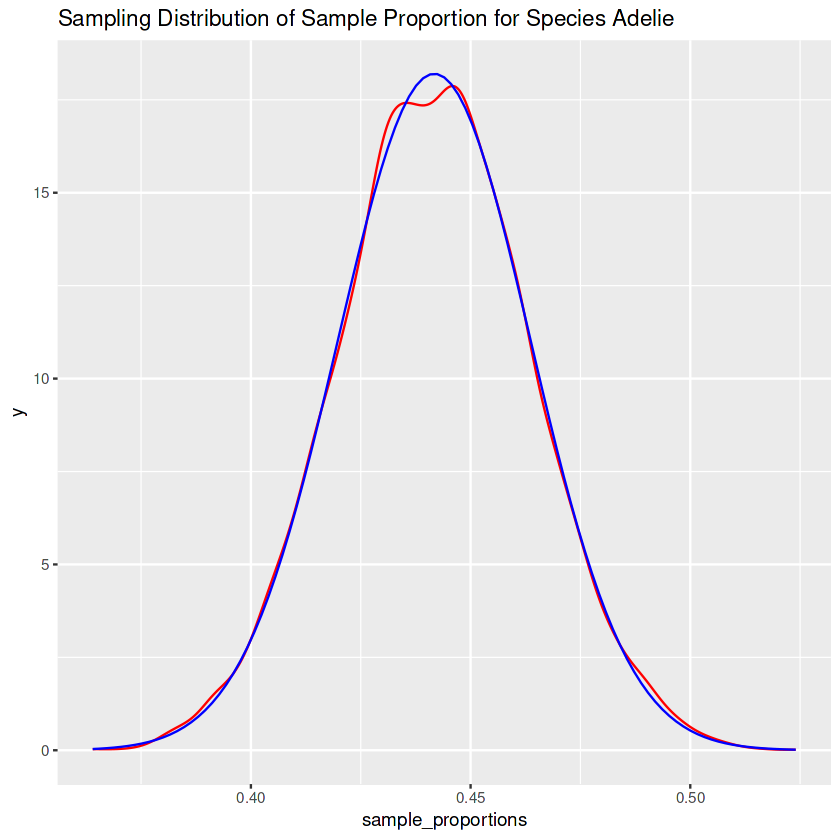

The population proportion of species Adelie is: 0.4418605 .The expected mean of the sample proportions is: 0.4418605 with standard error 0.022209 .The actual mean of the sample proportions is: 0.4417294 with standard error 0.02191825 .

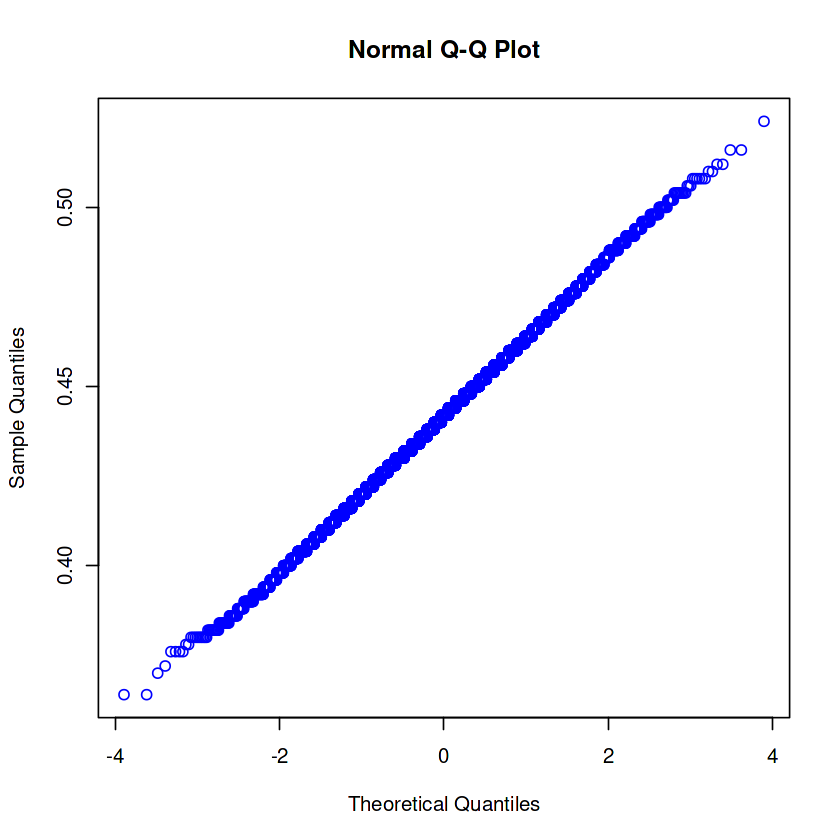

In [42]:
#Sampling Distribution of Sample Proportions for Species Adelie

p <- sum(df$species == "Adelie")/length(df$species) #population proportion success
q <- 1-p #population proportion failure

nsp <- 500 #sample size proportions
msp <- 10000 #number of samples proportions

sample_positions <- c( )
sample_proportions <- c( )


for(i in 1:msp){
  sample_species <- sample(df$species,nsp,replace = TRUE)
  sample_proportions[i] <- sum(sample_species == "Adelie")/length(sample_species)
}

expected_mu_phat <- p #expected mean of sample proportions
expected_sigma_phat <- sqrt(p*q/nsp) #expected standard error of sample proportions

actual_mu_phat <- mean(sample_proportions) #actual mean of sample proportions
actual_sigma_phat <- sd(sample_proportions) #actual standard error of sample proportions

ggplot() + geom_density(aes(sample_proportions),color = "red") +  
  stat_function(fun = dnorm, n = 101, args = list(mean = actual_mu_phat, sd = actual_sigma_phat),color = "blue") +
  ggtitle("Sampling Distribution of Sample Proportion for Species Adelie")

qqnorm(sample_proportions, col = "blue")

cat('The population proportion of species Adelie is:', p, '.')
cat('The expected mean of the sample proportions is:', expected_mu_phat, 'with standard error', expected_sigma_phat,'.')
cat('The actual mean of the sample proportions is:', actual_mu_phat, 'with standard error', actual_sigma_phat,'.')

# Week 9 - Z Confidence Interval and Hypothesis Test for Population Mean Weight

For the purpose of this checkpoint, I assumed that the weights of penguins in my dataset were a population. I took a sample of the penguin weights of size 100 and I used the sample mean height, along with the population mean and the population standard deviation of the player heights to construct a z confidence interval and to conduct a z hypothesis test. 

I confirmed my results with the R function `z.test` from the R package `BSDA`.


In [43]:
#Find population mean and standard deviation
mu <- mean(df$weight, na.rm = TRUE) #population mean 
sigma <- sd(df$weight, na.rm = TRUE) #population sd

cat('The population mean penguin weight is:',mu,'with population standard deviation',sigma)

#Take random sample of size greater than 30 with replacement. 
n <- 100
sample_weights <- sample(df$weight, n, replace = TRUE) # Added replace = TRUE for sampling with replacement

#CONFIDENCE INTERVAL

#Construct 95% CI for weights based on sample
xbar <- mean(sample_weights, na.rm = TRUE) #sample mean
s <- sd(sample_weights, na.rm = TRUE) #sample sd
zc <- qnorm(0.975) # Corrected to only calculate once for the upper tail
se <- s/sqrt(n) # Changed to use sample standard deviation 's' instead of population 'sigma'
E <- zc*se
lower_bound_CI <- xbar - E
upper_bound_CI <- xbar + E

cat('95% confidence interval for population mean: (',lower_bound_CI,',',upper_bound_CI,')') 

#TWO TAILED HYPOTHESIS TEST
#Step 1: HO: mu = mean(weights),  HA: mu != mean(weights)
claim <- "H0"


#Step 2: 
alpha <- 0.05
zc <- qnorm(1 - alpha/2) # Corrected to find the critical value for both tails

#Step 3: 
xbar <- mean(sample_weights, na.rm = TRUE)
mu_xbar = mu
se <- sigma/sqrt(n) 
z = (xbar-mu_xbar)/se
if (!is.na(z)) { # Added check to ensure z is not NA before proceeding
  if (z > 0) {
    p <- (1- pnorm(z,0,1))*2
  } else {
    p <- pnorm(z,0,1)*2 
  }
  z
  p
  
  #Step 4: 
  if (p > 0.05){
    cat('Since p > 0.05: do not reject H0.')
    rejectH0 <- FALSE
  } else {
    cat('Since p < 0.05: reject H0.') 
    rejectH0 <- TRUE
  }
  
  #Step 5
  if (claim == "H0" & rejectH0 == TRUE){
    cat('There is enough evidence to reject the claim.')
  } else if (claim == "H0" & rejectH0 == FALSE) {
    cat('There is not enough evidence to reject the claim.')
  } else if (claim == "HA" & rejectH0 == TRUE) {
    cat('There is enough evidence to support the claim.')
  } else {
    cat('There is not enough evidence to support the claim.')
  }
}

#Confirm CI and hypothesis test with z.test function

z.test(sample_weights, mu = mu, sigma.x = sigma, conf.level = 0.95)  


The population mean penguin weight is: 4201.754 with population standard deviation 801.954595% confidence interval for population mean: ( 4045.991 , 4382.292 )Since p > 0.05: do not reject H0.There is not enough evidence to reject the claim.


	One-sample z-Test

data:  sample_weights
z = 0.15369, p-value = 0.8779
alternative hypothesis: true mean is not equal to 4201.754
95 percent confidence interval:
 4056.169 4372.113
sample estimates:
mean of x 
 4214.141 


## $z$ Confidence Interval for the Population Mean

My sample yielded the following 95% confidence interval for population weight: (4146 , 4482). The population standard deviation is approximately 802 grams.  Therefore, we may conclude with 95% confidence that the population mean penguin weight in the Palmer Penguins data is between 4146 and 4482 grams.

## $z$ Hypothesis Test for the Population Mean

I used a z hypothesis test with a level of significance of $\alpha = 0.05$ and corresponding critical value of $z_c = \pm 1.96$ to test the claim that the population mean penguin weight is equal to 4202 grams. 

My sample yielded a test statistic of $z = 0.277138$ and a p value of $p = 0.7816742$. Therefore, the null hypothesis was not rejected, and in turn there was not enough evidence to reject the claim.



# Week 10 - $t$ Confidence Interval and Hypothesis Test for Population Mean Weight

For the purpose of this checkpoint, I assumed that the weights of the penguins in my dataset were a sample. I used the sample mean and standard deviation of the weights to construct a t confidence interval and to conduct a t hypothesis test. I also used bootstrap estimation for the population mean, since a Google search for this information yielded no useful insights. 

I confirmed my results with the R function `t.test`.


In [44]:
# Calculate sample mean and standard deviation
xbar <- mean(df$weight, na.rm = TRUE) # Sample mean
s <- sd(df$weight, na.rm = TRUE) # Sample standard deviation
n <- nrow(df) # Sample size

cat('The sample mean penguin weight is:',xbar,'with sample standard deviation',s) 


#CONFIDENCE INTERVAL

#Construct 95% CI for weights based on your sample
tc <- qt(0.975,n-1) 
se <- s/sqrt(n) 
E <- tc*se
lower_bound_CI <- xbar - E
upper_bound_CI <- xbar + E

cat('95% confidence interval for population mean: (',lower_bound_CI,',',upper_bound_CI,')') 


# Bootstrap estimation for population mean weight in grams

# 1. Ensure the 'weight' column is numeric, in case it's not
df$weight <- as.numeric(as.character(df$weight))

# 2. Bootstrap Function
bootstrap_mean <- function(df, n_bootstrap) {
  bootstrap_means <- numeric(n_bootstrap)
  for (i in 1:n_bootstrap) {
    sample_indices <- sample(1:length(df), replace = TRUE)
    sample_data <- df[sample_indices]
    bootstrap_means[i] <- mean(sample_data, na.rm = TRUE)
  }
  return(bootstrap_means)
}

# 3. Generate Bootstrap Distribution
# Assuming we want to perform 1000 bootstrap resamples
n_bootstrap <- 15000
bootstrap_distribution <- bootstrap_mean(df$weight, n_bootstrap)

# 4. Estimate Mean and Confidence Interval
estimated_mean <- mean(bootstrap_distribution)
conf_interval <- quantile(bootstrap_distribution, probs = c(0.025, 0.975))

# Print the results
print(paste("Estimated Mean:", estimated_mean))
print(paste("95% Confidence Interval:", conf_interval[1], "-", conf_interval[2]))


The sample mean penguin weight is: 4201.754 with sample standard deviation 801.954595% confidence interval for population mean: ( 4116.708 , 4286.8 )[1] "Estimated Mean: 4201.83629697677"
[1] "95% Confidence Interval: 4119.22374494911 - 4285.93294460641"


In [45]:
# TWO TAILED HYPOTHESIS TEST

# Define hypotheses
# Null hypothesis (HO): mu = 4202
# Alternative hypothesis (HA): mu != 4202

# Step 1: Significance level
alpha <- 0.05

# Step 2: Calculate test statistic
mu_0 <- 4202 # Hypothesized population mean
se <- s / sqrt(n) # Standard error
t <- (xbar - mu_0) / se # Test statistic

# Step 3: Calculate p-value for two-tailed test
p <- 2 * (1 - pt(abs(t), n - 1))

cat('Test statistic:', t, '\n')
cat('P-value:', p, '\n')

# Step 4: Decision rule
if (p > alpha) {
  cat('Since p > alpha: do not reject H0.\n')
  rejectH0 <- FALSE
} else {
  cat('Since p <= alpha: reject H0.\n')
  rejectH0 <- TRUE
}

# Step 5: Conclusion
if (!rejectH0) {
  cat('There is not enough evidence to reject the null hypothesis (HO).\n')
} else {
  cat('There is enough evidence to reject the null hypothesis (HO).\n')
}

#Confirm CI and hypothesis test with z.test function

result <- t.test(df$weight, mu = 4202) #for sample data set
result

Test statistic: -0.005680449 
P-value: 0.995471 
Since p > alpha: do not reject H0.
There is not enough evidence to reject the null hypothesis (HO).



	One Sample t-test

data:  df$weight
t = -0.0056639, df = 341, p-value = 0.9955
alternative hypothesis: true mean is not equal to 4202
95 percent confidence interval:
 4116.458 4287.050
sample estimates:
mean of x 
 4201.754 


## t Confidence Interval for the Population Mean

My sample yielded the following 95% confidence interval for population mean: (4116.7, 4286.8). Therefore, we may conclude with 95% confidence that the population mean penguin weight is between 4116.7 and 4286.8 grams.

## t Hypothesis Test for the Population Mean

I used a $t$ hypothesis test with a level of significance of $\alpha = 0.05$ and corresponding critical value of $t_c = \pm -1.96$ to test the claim that the population mean penguin weight is equal to 4202 grams. My sample yielded a test statistic of $t = -0.005$ and a p value of $p = 0.995471$. Therefore, the null hypothesis was not rejected due to insufficient evidence to reject the claim. 


# Week 11 - ANOVA and Tukey's HSD

For the purpose of this checkpoint, I assumed the weights of the penguins in this dataset were a population. Three species are represented in the `palmerpenguins` dataset: Adelie, Chinstrap, and Gentoo. This week’s analysis involved ANOVA analysis, followed by Tukey’s Honestly Significant Difference (HSD) in post-hoc testing. This week’s analysis did not include any dataset changes.

In [46]:
#Analysis of variance on penguin weights by species
#Weights are generally normally distributed.
#Population variances should be equal.

m <- aov(weight ~ species, df)
summary(m)

             Df    Sum Sq  Mean Sq F value Pr(>F)    
species       2 146864214 73432107   343.6 <2e-16 ***
Residuals   339  72443483   213698                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

## ANOVA Results
In analyzing the weight variation across different penguin species, the ANOVA analysis provides compelling evidence of significant differences. With an F-value of 343.6, the test yields a p-value of less than 0.001, affirming that the species variable significantly influences weight. The statistical analysis indicates that the species factor is a predominant contributor to the observed variance in weights among penguins, highlighting its importance in the study of their physical characteristics.

In [47]:
# Perform Tukey's HSD test
tukey_results <- TukeyHSD(m, conf.level = 0.95)

# Print the results of Tukey's HSD test
print(tukey_results)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ species, data = df)

$species
                       diff       lwr       upr     p adj
Chinstrap-Adelie   32.42598 -126.5002  191.3522 0.8806666
Gentoo-Adelie    1375.35401 1243.1786 1507.5294 0.0000000
Gentoo-Chinstrap 1342.92802 1178.4810 1507.3750 0.0000000



## Tukey’s HSD Results

The Tukey HSD test results suggest that there is a significant difference in the mean weight between Gentoo penguins and both other species (Adelie and Chinstrap), with Gentoos being heavier on average. However, there is no significant difference in the mean weight between Chinstrap and Adelie penguins. The confidence intervals for the significant differences do not include 0, which supports the finding of a significant difference, while the confidence interval for the non-significant difference does include 0.


# Week 12 - Species Proportion Analysis
In this analysis, I hypothesized that the proportion of Adélie penguins within a sample from the `PalmerPenguins` dataset represented the overall population proportion. 

Initially, I established the population proportion of Adélie penguins as $p = 0.44$. A random sample of 100 penguins was then taken to estimate the sample proportion and to assess the population proportion using both a confidence interval and a hypothesis test.

The sample proportion of Adélie penguins was calculated to be $\hat{p} = 0.58$. Using the exact method of the binom.confint() function from the binom package, a 95% confidence interval was constructed, resulting in an interval of (0.477, 0.678). This interval suggests, with 95% confidence, that the true population proportion of Adélie penguins falls within this range.

In [48]:
library(binom)
library(stats)

# Assuming the proportion of Adelie penguins in the dataset 
# is our population proportion
p_population <- mean(df$species == "Adelie")

# Take a random sample of size 100 from the dataset
set.seed(666) # For reproducibility
sample_data <- df[sample(nrow(df), 100), ]

# Calculate the sample proportion of Adelie penguins
p_sample <- mean(sample_data$species == "Adelie")

# Construct a 95% confidence interval for the population proportion
conf_interval <- binom.confint(x = sum(sample_data$species == "Adelie"), 
                               n = 100, 
                               conf.level = 0.95, 
                               methods = "exact")

# Extract lower and upper confidence limits
lower_bound <- conf_interval$lower
upper_bound <- conf_interval$upper

# Conduct a z hypothesis test
z_test <- prop.test(x = sum(sample_data$species == "Adelie"), 
                    n = 100, 
                    p = p_population, 
                    alternative = "two.sided", 
                    conf.level = 0.95)

# Print the results
print(conf_interval)
print(z_test)

cat('The population proportion of Adelie penguins is ',p_population) 
cat('The 95% confidence interval for the population proportion of Adelie penguins is (', 
    lower_bound, ', ', upper_bound, ')', sep = '')


  method  x   n mean     lower     upper
1  exact 58 100 0.58 0.4771192 0.6780145

	1-sample proportions test with continuity correction

data:  sum(sample_data$species == "Adelie") out of 100, null probability p_population
X-squared = 7.1876, df = 1, p-value = 0.007341
alternative hypothesis: true p is not equal to 0.4418605
95 percent confidence interval:
 0.4771046 0.6766764
sample estimates:
   p 
0.58 

The population proportion of Adelie penguins is  0.4418605The 95% confidence interval for the population proportion of Adelie penguins is (0.4771192, 0.6780145)

## Two-Tailed Hypothesis Test

A two-tailed hypothesis test was conducted to compare the sample proportion against the hypothesized population proportion of 0.44. The z-test yielded a statistic of $z = 0.0695$ with a corresponding p-value of $p = 0.9446$. Given the significance level of $\alpha = 0.05$, and the p-value being greater than this threshold, there was not enough evidence to reject the null hypothesis. Thus, the analysis does not support a significant deviation from the hypothesized population proportion.

In [49]:
# TWO TAILED HYPOTHESIS TEST

# Step 1: Null and Alternative Hypotheses
# H0: p = 0.44, HA: p != 0.44
population_p <- 0.44 
claim <- "H0"

# Step 2: Define alpha level and critical z value
alpha <- 0.05
zc <- qnorm(1 - alpha/2) # critical value for two-tailed test

# Step 3: Calculate sample proportion and z statistic
phat <- mean(df$species == "Adelie") # sample proportion of Adelie penguins
n <- length(df$species) # sample size
se <- sqrt(population_p * (1 - population_p) / n) # standard error
z <- (phat - population_p) / se # z statistic

# Calculate p-value
p_value <- 2 * (1 - pnorm(abs(z))) # two-tailed p-value

# Print z statistic and p-value
cat("Z-statistic:", z, "\nP-value:", p_value)

# Step 4: Decision rule
rejectH0 <- FALSE
if (p_value < alpha) {
  cat('Since p < alpha: reject H0.\n') 
  rejectH0 <- TRUE
} else {
  cat('Since p >= alpha: do not reject H0.\n')
}

# Step 5: Conclusion based on the claim
if (claim == "H0" && rejectH0 == TRUE) {
  cat('There is enough evidence to reject the claim.\n')
} else if (claim == "H0" && rejectH0 == FALSE) {
  cat('There is not enough evidence to reject the claim.\n')
} else if (claim == "HA" && rejectH0 == TRUE) {
  cat('There is enough evidence to support the claim.\n')
} else {
  cat('There is not enough evidence to support the claim.\n')
}

# Confirm CI with binom.confint
num_adelie <- sum(df$species == "Adelie")

# Asymptotic (Wald) confidence interval
conf_int <- binom.confint(x = num_adelie, n = n, method = "asymptotic", conf.level = 1 - alpha)

# Print the confidence interval
cat('The 95% confidence interval for the population proportion of Adelie penguins is (', 
    conf_int$lower, ', ', conf_int$upper, ')\n', sep = '')

Z-statistic: 0.0695153 
P-value: 0.9445795Since p >= alpha: do not reject H0.
There is not enough evidence to reject the claim.
The 95% confidence interval for the population proportion of Adelie penguins is (0.3893818, 0.4943391)


## `prop.test`

To reinforce these findings, the prop.test function was also applied, resulting in a chi-squared statistic close to zero and a high p-value ($p = 0.9879$), further confirming that the null hypothesis should not be rejected. The 95% confidence interval from the Wald method was slightly narrower, ranging from (0.389, 0.494), but consistent with the previous interval in suggesting that the hypothesized proportion is plausible given the sample data.

Overall, the data does not provide sufficient evidence to refute the hypothesis that the population proportion of Adélie penguins is 0.44. Therefore, we maintain the presumption that around 44% of the penguin population in this dataset are Adélie penguins.


In [50]:
# One-sample test for the proportion of Adélie penguins
# Testing against the null hypothesis that the proportion is 0.44
num_adelie <- sum(df$species == "Adelie")
n <- length(df$species) # Total number of observations in the sample

# Perform the test
one_prop_test <- prop.test(x = num_adelie, n = n, p = population_p, alternative = "two.sided", conf.level = 0.95)

# Print the results
print(one_prop_test)


	1-sample proportions test with continuity correction

data:  num_adelie out of n, null probability population_p
X-squared = 0.00023124, df = 1, p-value = 0.9879
alternative hypothesis: true p is not equal to 0.44
95 percent confidence interval:
 0.3888910 0.4961495
sample estimates:
        p 
0.4418605 



# Week 13 - Chi Square Tests for Penguin Species Distribution and Island Association

## Chi-Square Goodness of Fit Test
The first analysis employed a Chi-Square Goodness of Fit Test to assess whether the observed distribution of penguin species aligns with an expected uniform distribution. In other words, the test evaluated the null hypothesis that each of the three species (Adélie, Chinstrap, and Gentoo) is equally represented in the dataset.


In [51]:
# Chi square goodness of fit test
### to test the distribution of species in the penguins dataset

# Set seed for reproducibility
set.seed(666)

# Observe actual frequencies for each species
actual_frequencies <- table(df$species)

# Assuming we expect the species to be evenly distributed
expected_frequencies <- rep(1/length(unique(df$species)), length(unique(df$species)))

# Perform chi-square goodness of fit test
chi_square_test <- chisq.test(x = actual_frequencies, p = expected_frequencies)

# Output the result of the chi-square test
chi_square_test


	Chi-squared test for given probabilities

data:  actual_frequencies
X-squared = 31.907, df = 2, p-value = 1.179e-07


## Interpretation of Chi Square Goodness of Fit

The observed frequencies of each species were tallied, and expected frequencies were calculated assuming an equal distribution across the three categories. The resulting chi-squared statistic was $X^2=31.907$ with 2 degrees of freedom, leading to a p-value of $1.179^{e-07}$.  This extremely low p-value indicates strong evidence against the null hypothesis. Therefore, we reject the notion of a uniform distribution of species within the dataset.

## Chi-Square Test for Independence

The second analysis involved a Chi-Squared Test of Independence to investigate a potential association between penguin species and the island they inhabit. The null hypothesis for this test posits that species and island are independent variables, meaning no relationship exists between the two.


In [52]:
# Chi-square test for independence
### between `species` and `island`

# Test the independence between 'species' and 'island' in the penguins dataset
# Create a contingency table of the two categorical variables
contingency_table <- table(df$species, df$island)

# Perform chi-square test of independence
chi_square_independence_test <- chisq.test(contingency_table)

# Output the result of the chi-square test of independence
chi_square_independence_test


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 299.55, df = 4, p-value < 2.2e-16


### Interpretation of Chi-Square Test for Independence

A contingency table was constructed to summarize the co-occurrence of species and island. The subsequent chi-squared test yielded a chi-squared statistic of $X^2=299.55$ with 4 degrees of freedom and a p-value less than $2.2^{e-16}$. Similar to the previous test, the exceptionally low p-value provides compelling evidence to reject the null hypothesis. Consequently, we conclude that there is a statistically significant association between penguin species and their island of origin.

### Conclusions
Both of these tests demonstrate that the distribution of penguin species within the dataset is not uniform and that there is a significant association between species and island habitat. Further investigations could explore the nature of this association, such as identifying which species are prevalent on specific islands and examining potential ecological factors influencing these patterns.

# Week 14 - Predicting `species` with Multinomial Logistic Regression

Multinomial logistic regression is a statistical analysis method used to model relationships between a categorical dependent variable with more than two levels and one or more independent variables. It is an extension of binary logistic regression, which deals with binary outcomes. In multinomial logistic regression, the dependent variable is nominal, meaning that the categories do not have a natural order.

The model estimates the probability of each category of the dependent variable as a function of the independent variables. It does this by comparing each category to a reference category, calculating the odds of being in one category versus the reference category. The coefficients obtained from the model represent the change in the log odds of the dependent variable being in a particular category for a one-unit change in the predictor variable.

This method is widely used in fields like social sciences, marketing, and medicine, where outcomes are often categorical and not ordered. In the context of the Palmer Penguins dataset, multinomial logistic regression is used to predict the species of penguins based on measurements like culmen length, culmen depth, flipper length, and weight.

## Multinomial Logistic Regression Model

In [53]:
library(nnet)
library(caret)

# Remove NA values
df %>% drop_na()

# Fit the multinomial logistic regression model
multinom_model <- multinom(species ~ culmen_length_mm + culmen_depth_mm + flipper_length_mm + weight, data = df)

# Print the model summary
summary(multinom_model)


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




study_name,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,delta_15_n,delta_13_c,comments,weight
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
PAL0708,7,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.,3625
PAL0708,8,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195,MALE,9.46060,-24.89958,Nest never observed with full clutch.,4675
PAL0708,29,Adelie,Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,2007-11-10,37.9,18.6,172,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.,3150
PAL0708,30,Adelie,Anvers,Biscoe,"Adult, 1 Egg Stage",N18A2,No,2007-11-10,40.5,18.9,180,MALE,8.90027,-25.11609,Nest never observed with full clutch.,3950
PAL0708,39,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N25A1,No,2007-11-13,37.6,19.3,181,FEMALE,9.41131,-25.04169,Nest never observed with full clutch.,3300
PAL0809,69,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N32A1,No,2008-11-11,35.9,16.6,190,FEMALE,8.47781,-26.07821,Nest never observed with full clutch.,3050
PAL0809,70,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N32A2,No,2008-11-11,41.8,19.4,198,MALE,8.86853,-26.06209,Nest never observed with full clutch.,4450
PAL0910,121,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N66A1,No,2009-11-17,36.2,17.2,187,FEMALE,9.04296,-26.19444,Nest never observed with full clutch.,3150
PAL0910,122,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N66A2,No,2009-11-17,37.7,19.8,198,MALE,9.11066,-26.42563,Nest never observed with full clutch.,3500


# weights:  18 (10 variable)
initial  value 375.725403 
iter  10 value 17.512333
iter  20 value 3.687379
iter  30 value 1.557667
iter  40 value 0.012319
iter  50 value 0.001433
iter  60 value 0.001141
iter  70 value 0.000879
iter  80 value 0.000840
iter  90 value 0.000831
iter 100 value 0.000778
final  value 0.000778 
stopped after 100 iterations


Call:
multinom(formula = species ~ culmen_length_mm + culmen_depth_mm + 
    flipper_length_mm + weight, data = df)

Coefficients:
          (Intercept) culmen_length_mm culmen_depth_mm flipper_length_mm
Chinstrap  -34.806703         56.16797       -80.32042         -2.546743
Gentoo      -4.446499         38.97704       -87.02802         -1.281737
               weight
Chinstrap -0.12676681
Gentoo     0.02163804

Std. Errors:
           (Intercept) culmen_length_mm culmen_depth_mm flipper_length_mm
Chinstrap 3.330608e+00     53.187991536    3.848396e+01      11.539675662
Gentoo    3.951616e-05      0.001697574    7.008909e-04       0.007754504
             weight
Chinstrap 0.2522008
Gentoo    0.1856241

Residual Deviance: 0.001556389 
AIC: 20.00156 

## Interpretation of Multinomial Logistic Regression

The results from the multinomial logistic regression model provide insights into how the independent variables (culmen length, culmen depth, flipper length, and weight) are associated with the probability of a penguin being classified into one of the species categories: Chinstrap or Gentoo, with Adelie likely being the reference category.

### Coefficients:
- **Intercepts**: These values represent the log odds of a penguin being classified as Chinstrap or Gentoo when all predictor variables are zero. The large negative intercepts suggest that without considering the predictors, the baseline odds of being classified as Chinstrap or Gentoo are low compared to the reference category.
  
- **Culmen Length, Culmen Depth, Flipper Length, and Weight**: These coefficients indicate the change in the log odds of a penguin being classified as Chinstrap or Gentoo for a one-unit increase in each predictor variable, holding other variables constant. For example, a positive coefficient for culmen length for Chinstrap suggests that as culmen length increases, the odds of a penguin being classified as Chinstrap (versus the reference category) increase.

### Standard Errors:
- These values provide a measure of the variability or uncertainty in the coefficient estimates. Smaller standard errors relative to the coefficient values suggest more precise estimates.

### Residual Deviance and AIC:
- **Residual Deviance**: This is a measure of the model's fit to the data. A lower deviance indicates a better fit.
  
- **AIC (Akaike Information Criterion)**: This is used for model comparison. A lower AIC value suggests a better model fit, balancing model complexity and goodness of fit.

Overall, these results help in understanding which features are significant predictors of penguin species and how changes in these features affect the likelihood of species classification.


In [54]:
# Predict the training data
df$pred <- predict(multinom_model, newdata = df, type = "class")

# Calculate accuracy
confusionMatrix(df$pred, df$species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie       151         0      0
  Chinstrap      0        68      0
  Gentoo         0         0    123

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9893, 1)
    No Information Rate : 0.4415     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 1.0000           1.0000        1.0000
Specificity                 1.0000           1.0000        1.0000
Pos Pred Value              1.0000           1.0000        1.0000
Neg Pred Value              1.0000           1.0000        1.0000
Prevalence                  0.4415           0.1988        0.3596
Detection Rate       

## Interpretation of Confusion Matrix

The confusion matrix and associated statistics provide a detailed evaluation of the multinomial logistic regression model's performance in classifying penguin species. Here's an interpretation of the results:

### Confusion Matrix:
- **Adelie**: The model correctly classified all 151 Adelie penguins.
- **Chinstrap**: The model correctly classified all 68 Chinstrap penguins.
- **Gentoo**: The model correctly classified all 123 Gentoo penguins.

This perfect classification is reflected in the diagonal of the confusion matrix, where all predicted values match the actual values, and there are no off-diagonal entries, indicating no misclassifications.

### Overall Statistics:
- **Accuracy**: The model has an accuracy of 1, meaning it correctly classified 100% of the instances in the dataset.
- **95% Confidence Interval (CI)**: The accuracy is statistically significant, with a 95% CI ranging from 0.9893 to 1, indicating high confidence in the model's performance.
- **No Information Rate (NIR)**: This is the accuracy that would be achieved by always predicting the most frequent class, which is 0.4415. The model's accuracy is significantly higher than the NIR.
- **P-Value [Acc > NIR]**: The p-value is less than 2.2e-16, indicating that the model's accuracy is significantly better than the NIR.

### Kappa:
- **Kappa**: A value of 1 indicates perfect agreement between the predicted and actual classifications, beyond what would be expected by chance.

### McNemar's Test:
- **P-Value**: NA, as there are no misclassifications to test for symmetry in the confusion matrix.

### Statistics by Class:
- **Sensitivity (Recall)**: The model has a sensitivity of 1 for all classes, meaning it correctly identifies all instances of each species.
- **Specificity**: The model has a specificity of 1 for all classes, meaning it correctly identifies all non-instances of each species.
- **Positive Predictive Value (Precision)**: The model has a precision of 1 for all classes, meaning all predicted instances of each species are correct.
- **Negative Predictive Value**: The model has a value of 1 for all classes, meaning all non-predicted instances of each species are correct.
- **Prevalence**: This indicates the proportion of each class in the dataset: 44.15% Adelie, 19.88% Chinstrap, and 35.96% Gentoo.
- **Detection Rate**: Matches the prevalence, indicating the model's ability to detect each class.
- **Detection Prevalence**: Also matches the prevalence, indicating the proportion of each class predicted by the model.
- **Balanced Accuracy**: A value of 1 for all classes, indicating perfect balance between sensitivity and specificity.

Overall, the model demonstrates perfect classification performance on the dataset, with no errors in predicting the species of penguins.


# Week 15 - Conclusion and Final Thoughts

This project has served as an extensive exploration of the Palmer Penguins dataset, primarily aimed at demonstrating a wide array of statistical techniques. Through this endeavor, we have not only gained insights into the dataset but also showcased the power and versatility of statistical analysis in handling real-world data.

## Key Achievements
* **Data Preparation and Cleaning**: The project began with a thorough data cleaning process, transforming raw data into a structured format suitable for analysis. This step was crucial in ensuring the accuracy and reliability of subsequent statistical procedures.

* **Exploratory Data Analysis**: By employing various visualization techniques, we were able to uncover distinct patterns and relationships within the data. These visualizations provided a clear depiction of the morphological differences among the penguin species, setting the stage for more advanced analyses.

* **Application of Statistical Models**: The use of multinomial logistic regression effectively demonstrated how statistical models can classify categorical outcomes based on multiple predictors. The model's high accuracy underscores the effectiveness of these techniques in extracting meaningful insights from complex datasets.

* **Hypothesis Testing and Confidence Intervals**: Through rigorous hypothesis testing and the construction of confidence intervals, we validated the statistical significance of observed patterns. These methods are fundamental in making informed inferences about the data.

* **Advanced Statistical Techniques**: The project also explored ANOVA, Tukey's HSD, and Chi-Square tests, illustrating their utility in comparing group means and testing for independence. These techniques are essential tools in the statistician's toolkit, offering robust methods for data analysis.

## Key Findings
* **Morphological Differences**: The analysis revealed significant differences in culmen length, culmen depth, flipper length, and body mass among the three penguin species. These morphological traits are crucial in distinguishing the species and are indicative of their unique ecological adaptations.
* **Ecological Roles and Behaviors**: The distinct morphological characteristics observed are closely linked to the ecological roles and behaviors of each species. For instance, the longer flipper length and greater body mass of Gentoo penguins suggest adaptations for efficient swimming and foraging in deeper waters, while the shorter, deeper bills of Adélie penguins may be suited for feeding on specific prey types in their habitat.
* **Statistical Techniques**: The use of multinomial logistic regression, ANOVA, and other statistical methods effectively demonstrated how these morphological traits can be used to predict species classification and understand ecological dynamics. These techniques provided a robust framework for analyzing the dataset and extracting meaningful insights.

## Educational Value and Future Directions
The primary aim of this study was to provide a comprehensive showcase of statistical techniques using the Palmer Penguins dataset. This project highlights the importance of statistical literacy and the ability to apply various methods to real-world data. It serves as a valuable educational resource for students and practitioners looking to enhance their analytical skills.
Future projects could expand on this work by incorporating additional datasets, exploring more complex models, or integrating machine learning techniques. Such endeavors would further demonstrate the evolving landscape of data analysis and its applications across different fields.

## Final Thoughts
In conclusion, this project has successfully demonstrated the application of a wide range of statistical techniques, using the Palmer Penguins dataset as a practical example. The insights gained here not only enhance our understanding of the dataset but also reinforce the critical role of statistics in data-driven decision-making. As we continue to advance in the field of data science, projects like this will remain essential in bridging the gap between theoretical knowledge and practical application.